# The Urban Parking Dilemma
In many cities, parking is a serious challenge. Some lots are constantly overcrowded, while others just blocks away remain largely unused.
---
Summer Analytics 2025

##  Why the Imbalance?
A major reason is that most parking prices remain fixed, regardless of:

Current occupancy levels

Local traffic congestion

Type of incoming vehicle (bike, car, truck)

Whether it’s a holiday or a special event

This rigid pricing fails to reflect real-time demand or external conditions.

## Our Objective
Design an AI-driven dynamic pricing engine for 14 urban parking lots, capable of:

Increasing prices when demand is high

Lowering prices to attract vehicles during slow periods

Learning from historical and live data to optimize prices in real time

## What is Dynamic Pricing?
Think of it like how airline tickets or Uber fares fluctuate:

Prices are updated every 30 minutes

Adjustments are based on live data like occupancy, traffic, and more

Each lot starts from a base price (e.g., $10) and adapts from there

This ensures smarter pricing, better lot usage, and a fairer experience for drivers.

## Visualization Strategy with Bokeh
To help make sense of the dynamic pricing behavior, we’ll build interactive visualizations using Bokeh, showing:

How each lot’s pricing evolves over time

Comparisons between nearby lots to highlight demand-based changes

## Simulating Real-Time Data with Pathway
Rather than loading a static dataset all at once, we’ll simulate a live stream of data:

One row arrives at a time (mimicking real-world input)

Pricing decisions update instantly based on each new data point

Pathway helps manage this real-time pipeline efficiently and effectively

## Library Imports

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bp
from bokeh.io import output_notebook, show
output_notebook()

## Data Loading & Exploration (Please add the dataset [Click here!](https://drive.google.com/drive/folders/1ts6zhcX8hAj1X-c9HLre_giZpGT7zxT5))

In [128]:
df = pd.read_csv('dataset.csv')

In [129]:
print(df.shape)

(18368, 12)


In [130]:
df.columns

Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime'],
      dtype='object')

In [131]:
df.tail(10)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
18358,18358,Shopping,1920,26.150504,91.733531,1424,car,average,7,0,19-12-2016,12:03:00
18359,18359,Shopping,1920,26.150504,91.733531,1475,cycle,high,10,0,19-12-2016,12:30:00
18360,18360,Shopping,1920,26.150504,91.733531,1510,car,high,9,0,19-12-2016,13:03:00
18361,18361,Shopping,1920,26.150504,91.733531,1510,bike,high,9,0,19-12-2016,13:30:00
18362,18362,Shopping,1920,26.150504,91.733531,1521,car,average,5,0,19-12-2016,14:03:00
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00
18367,18367,Shopping,1920,26.150504,91.733531,1180,car,low,2,0,19-12-2016,16:30:00


In [132]:
df.head(10)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
5,5,BHMBCCMKT01,577,26.144536,91.736172,177,car,low,3,0,04-10-2016,10:26:00
6,6,BHMBCCMKT01,577,26.144536,91.736172,219,truck,high,6,0,04-10-2016,10:59:00
7,7,BHMBCCMKT01,577,26.144536,91.736172,247,car,average,5,0,04-10-2016,11:25:00
8,8,BHMBCCMKT01,577,26.144536,91.736172,259,cycle,average,5,0,04-10-2016,11:59:00
9,9,BHMBCCMKT01,577,26.144536,91.736172,266,bike,high,8,0,04-10-2016,12:29:00


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [134]:
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000


# Model 1: Baseline Linear Model

## Formula:

$$
\text{Price}_{t+1} = \text{Price}_t + \alpha \times \left(\frac{\text{Occupancy}}{\text{Capacity}}\right)
$$

* Start with **Price = \$10**
* Use a fixed **α (alpha)** value (e.g., `0.3`) - Stable pricing for brand trust
* Ensure the price stays within reasonable bounds (e.g., `$5 to $20`)
* Calculate price **per lot**, sorted in time

In [135]:
# Combining date and time to create a timestamp
df['Timestamp'] = pd.to_datetime(
    df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
    format='%d-%m-%Y %H:%M:%S'
)

In [136]:
# Sorting data by parking lot and time
df_sorted = df.sort_values(by=['SystemCodeNumber', 'Timestamp']).copy()

In [137]:
df_sorted

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,2016-10-04 09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00,2016-12-19 14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00,2016-12-19 15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00,2016-12-19 15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00,2016-12-19 16:03:00


In [138]:
# Set pricing parameters
alpha = 0.3
base_price = 10.0
min_price = 5.0
max_price = 20.0

In [139]:
# Apply pricing logic per parking lot
baseline_prices = []

In [140]:
for lot_id, lot_data in df_sorted.groupby('SystemCodeNumber'):
    price = base_price
    lot_prices = []

    for _, row in lot_data.iterrows():
        occupancy_ratio = row['Occupancy'] / row['Capacity']
        price += alpha * occupancy_ratio
        price = max(min_price, min(price, max_price))
        lot_prices.append(price)

    baseline_prices.extend(lot_prices)

In [141]:
# Add BaselinePrice to your dataframe
df_sorted['BaselinePrice'] = baseline_prices

In [142]:
# Step 6: Preview the results
df_sorted[['SystemCodeNumber', 'Timestamp', 'Occupancy', 'Capacity', 'BaselinePrice']].head(10)

,SystemCodeNumber,Timestamp,Occupancy,Capacity,BaselinePrice
0,BHMBCCMKT01,2016-10-04 07:59:00,61,577,10.031716
1,BHMBCCMKT01,2016-10-04 08:25:00,64,577,10.064991
2,BHMBCCMKT01,2016-10-04 08:59:00,80,577,10.106586
3,BHMBCCMKT01,2016-10-04 09:32:00,107,577,10.162218
4,BHMBCCMKT01,2016-10-04 09:59:00,150,577,10.240208
5,BHMBCCMKT01,2016-10-04 10:26:00,177,577,10.332236
6,BHMBCCMKT01,2016-10-04 10:59:00,219,577,10.446101
7,BHMBCCMKT01,2016-10-04 11:25:00,247,577,10.574523
8,BHMBCCMKT01,2016-10-04 11:59:00,259,577,10.709185
9,BHMBCCMKT01,2016-10-04 12:29:00,266,577,10.847487


In [143]:
# Filter for a single parking lot
first_lot = df_sorted['SystemCodeNumber'].unique()[0]
df_lot = df_sorted[df_sorted['SystemCodeNumber'] == first_lot]

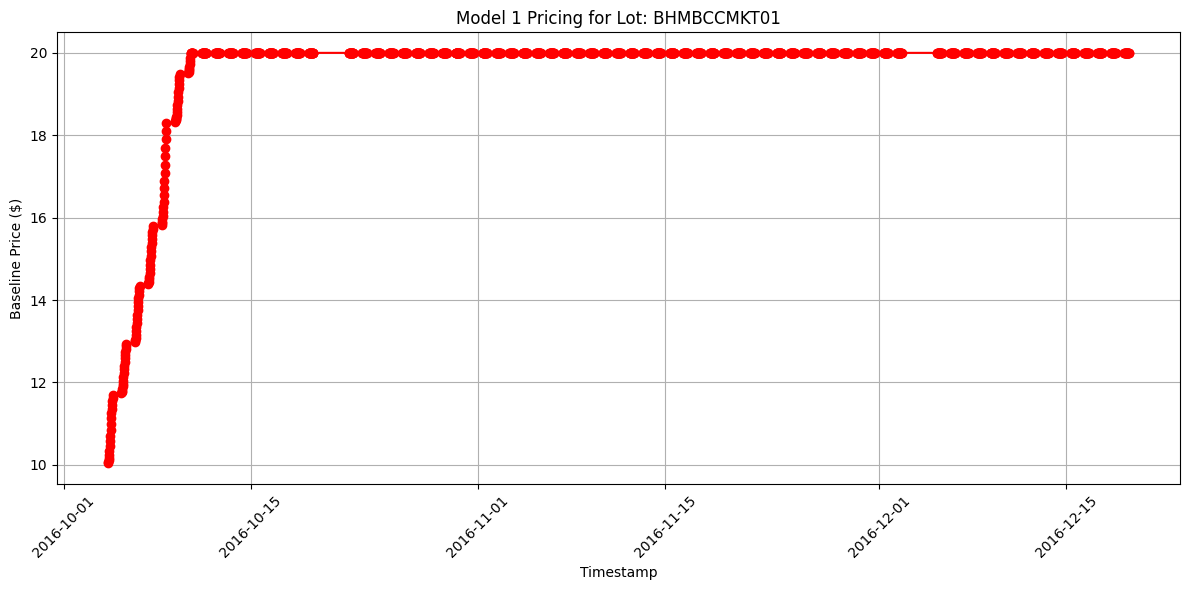

In [144]:
# Plot price over time
plt.figure(figsize=(12, 6))
plt.plot(df_lot['Timestamp'], df_lot['BaselinePrice'], color='r', marker='o', linestyle='-')
plt.title(f"Model 1 Pricing for Lot: {first_lot}")
plt.xlabel("Timestamp")
plt.ylabel("Baseline Price ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bokeh

In [145]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import layout

In [146]:
output_notebook()

In [147]:
source = ColumnDataSource(df_lot)

In [148]:
p = figure(x_axis_type='datetime', title=f"Model 1 Pricing for Lot: {first_lot}",
           width=900, height=400)
p.line('Timestamp', 'BaselinePrice', source=source, line_width=2, color='navy', legend_label="Baseline Price")
p.scatter('Timestamp', 'BaselinePrice', source=source, size=5, color='red')
# Changed circle() to scatter()

GlyphRenderer(id='feb81fe2-207d-4592-b0c5-699ef3ada0e9', ...)

In [149]:
# Style plot
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Price ($)'
p.legend.location = 'top_left'
p.grid.grid_line_alpha = 0.3

In [150]:
show(p)

## Compare Pricing for Multiple Parking Lots

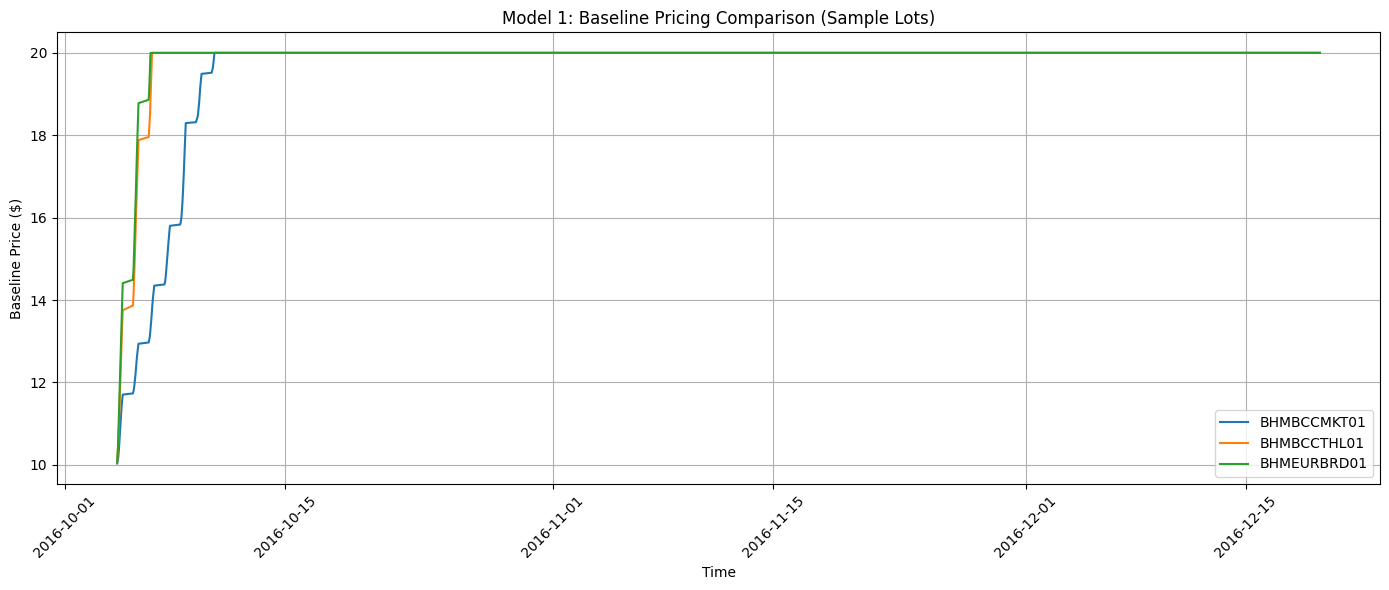

In [151]:
sample_lots = df_sorted['SystemCodeNumber'].unique()[:3]

plt.figure(figsize=(14, 6))

for lot in sample_lots:
    lot_data = df_sorted[df_sorted['SystemCodeNumber'] == lot]
    plt.plot(lot_data['Timestamp'], lot_data['BaselinePrice'], label=lot)

plt.title("Model 1: Baseline Pricing Comparison (Sample Lots)")
plt.xlabel("Time")
plt.ylabel("Baseline Price ($)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Estimate Revenue per Row

Since:

$$
\text{Revenue}_t = \text{Occupancy}_t \times \text{Price}_t
$$

We can add a `Revenue` column for each row using `BaselinePrice`.



In [152]:
# Calculate revenue per row
df_sorted['Revenue'] = df_sorted['Occupancy'] * df_sorted['BaselinePrice']

In [153]:
# Preview updated DataFrame
df_sorted[['SystemCodeNumber', 'Timestamp', 'Occupancy', 'BaselinePrice', 'Revenue']].head(10)

,SystemCodeNumber,Timestamp,Occupancy,BaselinePrice,Revenue
0,BHMBCCMKT01,2016-10-04 07:59:00,61,10.031716,611.934662
1,BHMBCCMKT01,2016-10-04 08:25:00,64,10.064991,644.159445
2,BHMBCCMKT01,2016-10-04 08:59:00,80,10.106586,808.526863
3,BHMBCCMKT01,2016-10-04 09:32:00,107,10.162218,1087.357366
4,BHMBCCMKT01,2016-10-04 09:59:00,150,10.240208,1536.031196
5,BHMBCCMKT01,2016-10-04 10:26:00,177,10.332236,1828.805719
6,BHMBCCMKT01,2016-10-04 10:59:00,219,10.446101,2287.696014
7,BHMBCCMKT01,2016-10-04 11:25:00,247,10.574523,2611.907279
8,BHMBCCMKT01,2016-10-04 11:59:00,259,10.709185,2773.679029
9,BHMBCCMKT01,2016-10-04 12:29:00,266,10.847487,2885.431542


In [154]:
# Select relevant columns
model1_output = df_sorted[['SystemCodeNumber', 'Timestamp', 'Occupancy', 'Capacity', 'BaselinePrice', 'Revenue']]

In [155]:
# Save to CSV
model1_output.to_csv("model1.csv", index=False)

## Summary Documentation Cell for Model 1

### Model 1: Baseline Linear Pricing

#### Objective:

To create a simple pricing model where the parking price increases **linearly** with **occupancy**, simulating basic economic behavior (high demand → higher price).

#### Formula:

$$
\text{Price}_{t+1} = \text{Price}_t + \alpha \times \left(\frac{\text{Occupancy}}{\text{Capacity}}\right)
$$

* **Base Price:** \$10.00
* **Alpha (α):** 0.3 *(slow and profit-focused)*
* **Clipping Range:** \$5.00 to \$20.00

  * Prevents unrealistic price surges or underpricing

---

#### Assumptions:

* Occupancy ratio directly reflects real-time demand.
* Price updates are **smooth and gradual** (not erratic).
* External features like traffic and queue are **not** used in this model (reserved for Model 2).
* Occupancy data is assumed to be accurate and synced in time.

---

#### Implementation Highlights:

* Prices are calculated **per lot** and **over time** using a rolling update.
* Price is clipped between \$5 and \$20 to maintain economic realism.
* Revenue is calculated as:

$$
\text{Revenue}_t = \text{BaselinePrice}_t \times \text{Occupancy}_t
$$

---

#### Outputs:

* Column: `BaselinePrice` — dynamically updated price
* Column: `Revenue` — estimated revenue at each time step
* Visualization: Price trend vs time (per lot)
* File: `model1_baseline_pricing_output.csv` — cleaned output

---

# Model 2: Demand-Based Pricing

## Objective

Create a smarter pricing model where the price responds to **demand signals**, using:

* Occupancy Rate
* Queue Length
* Traffic Conditions
* Special Day Indicator
* Vehicle Type

## Encoding Mappings

In [156]:
df['VehicleType'].unique()

array(['car', 'bike', 'truck', 'cycle'], dtype=object)

In [157]:
# Changing VehicleType to VehicleTypeWeight
vehicle_weights = {
    'bike': 0.5,
    'car': 1.0,
    'truck': 1.5,
    'cycle': 0.7  # for rare type
}

In [158]:
# Changing TrafficConditionNearby to TrafficLevel
traffic_levels = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'average': 1  # to treat 'average' like 'medium'
}

In [159]:
# Made a copy to work on Model 2
df_model2 = df_sorted.copy()

In [160]:
df_model2['VehicleTypeWeight'] = df_model2['VehicleType'].map(vehicle_weights)
df_model2['TrafficLevel'] = df_model2['TrafficConditionNearby'].map(traffic_levels)

In [161]:
df_model2[['VehicleType', 'VehicleTypeWeight', 'TrafficConditionNearby', 'TrafficLevel']].head(10)

,VehicleType,VehicleTypeWeight,TrafficConditionNearby,TrafficLevel
0,car,1.0,low,0
1,car,1.0,low,0
2,car,1.0,low,0
3,car,1.0,low,0
4,bike,0.5,low,0
5,car,1.0,low,0
6,truck,1.5,high,2
7,car,1.0,average,1
8,cycle,0.7,average,1
9,bike,0.5,high,2


## Define Feature Weights & Calculate Demand

$$
\text{Demand}_t = \alpha \cdot \left(\frac{\text{Occupancy}}{\text{Capacity}}\right) + \beta \cdot \text{QueueLength} - \gamma \cdot \text{TrafficLevel} + \delta \cdot \text{IsSpecialDay} + \epsilon \cdot \text{VehicleTypeWeight}
$$

---

### Weights (We can tune these later):

| Feature         | Symbol | Suggested Value | Reason                                |
| --------------- | ------ | --------------- | ------------------------------------- |
| Occupancy Ratio | α      | `1.0`           | Core demand driver                    |
| Queue Length    | β      | `0.5`           | Extra waiting implies high demand     |
| Traffic Level   | γ      | `0.3`           | High traffic may reduce desirability  |
| Special Day     | δ      | `1.0`           | Demand spikes on events/holidays      |
| Vehicle Weight  | ε      | `0.2`           | Bigger vehicles = more valuable space |


In [162]:
# Define weights
alpha = 1.0
beta = 0.5
gamma = 0.3
delta = 1.0
epsilon = 0.2

In [163]:
# Compute occupancy ratio
df_model2['OccupancyRatio'] = df_model2['Occupancy'] / df_model2['Capacity']

In [164]:
# Calculate raw demand score
df_model2['RawDemand'] = (
    alpha   * df_model2['OccupancyRatio'] +
    beta    * df_model2['QueueLength'] -
    gamma   * df_model2['TrafficLevel'] +
    delta   * df_model2['IsSpecialDay'] +
    epsilon * df_model2['VehicleTypeWeight']
)

In [165]:
df_model2[['Occupancy', 'Capacity', 'OccupancyRatio', 'QueueLength', 'TrafficLevel',
           'IsSpecialDay', 'VehicleTypeWeight', 'RawDemand']].head(10)

,Occupancy,Capacity,OccupancyRatio,QueueLength,TrafficLevel,IsSpecialDay,VehicleTypeWeight,RawDemand
0,61,577,0.105719,1,0,0,1.0,0.805719
1,64,577,0.110919,1,0,0,1.0,0.810919
2,80,577,0.138648,2,0,0,1.0,1.338648
3,107,577,0.185442,2,0,0,1.0,1.385442
4,150,577,0.259965,2,0,0,0.5,1.359965
5,177,577,0.306759,3,0,0,1.0,2.006759
6,219,577,0.379549,6,2,0,1.5,3.079549
7,247,577,0.428076,5,1,0,1.0,2.828076
8,259,577,0.448873,5,1,0,0.7,2.788873
9,266,577,0.461005,8,2,0,0.5,3.961005


## Normalize Demand

We want to **scale `RawDemand` into a range between 0 and 1**, so that pricing remains:

* **Smooth** (no huge jumps)
* **Bounded** (doesn’t exceed 2x or go below 0.5x base price)

---

### Method: **Min-Max Normalization**

$$
\text{NormalizedDemand}_t = \frac{\text{RawDemand}_t - \text{Min}}{\text{Max} - \text{Min}}
$$

We'll then use it in:

$$
\text{Model2Price}_t = \text{BasePrice} \cdot (1 + \lambda \cdot \text{NormalizedDemand})
$$

---

In [166]:
raw_min = df_model2['RawDemand'].min()
raw_max = df_model2['RawDemand'].max()

In [167]:
df_model2['NormalizedDemand'] = (df_model2['RawDemand'] - raw_min) / (raw_max - raw_min)

In [168]:
df_model2[['RawDemand', 'NormalizedDemand']].head(10)

,RawDemand,NormalizedDemand
0,0.805719,0.077414
1,0.810919,0.078000
2,1.338648,0.137496
3,1.385442,0.142772
4,1.359965,0.139900
5,2.006759,0.212819
6,3.079549,0.333766
7,2.828076,0.305415
8,2.788873,0.300995
9,3.961005,0.433142


### Compute Final Price Using Normalized Demand

We now apply the dynamic pricing formula:

$$
\text{Model2Price}_t = \text{BasePrice} \cdot (1 + \lambda \cdot \text{NormalizedDemand})
$$

---

In [169]:
#Final pricing
base_price = 10.0
lambda_ = 1.0  # sensitivity to normalized demand
min_price = 5.0
max_price = 20.0

In [170]:
# Compute price using normalized demand
df_model2['Model2Price'] = base_price * (1 + lambda_ * df_model2['NormalizedDemand'])

In [171]:
# Clip the price between min and max bounds
df_model2['Model2Price'] = df_model2['Model2Price'].clip(lower=min_price, upper=max_price)

In [172]:
# Preview result
df_model2[['NormalizedDemand', 'Model2Price']].head(10)

,NormalizedDemand,Model2Price
0,0.077414,10.774137
1,0.078000,10.779999
2,0.137496,11.374963
3,0.142772,11.427719
4,0.139900,11.398996
5,0.212819,12.128194
6,0.333766,13.337661
7,0.305415,13.054150
8,0.300995,13.009952
9,0.433142,14.331418


# Plotting Model2Price vs Model1Price Over Time

In [173]:
# Pick a sample parking lot
sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot]

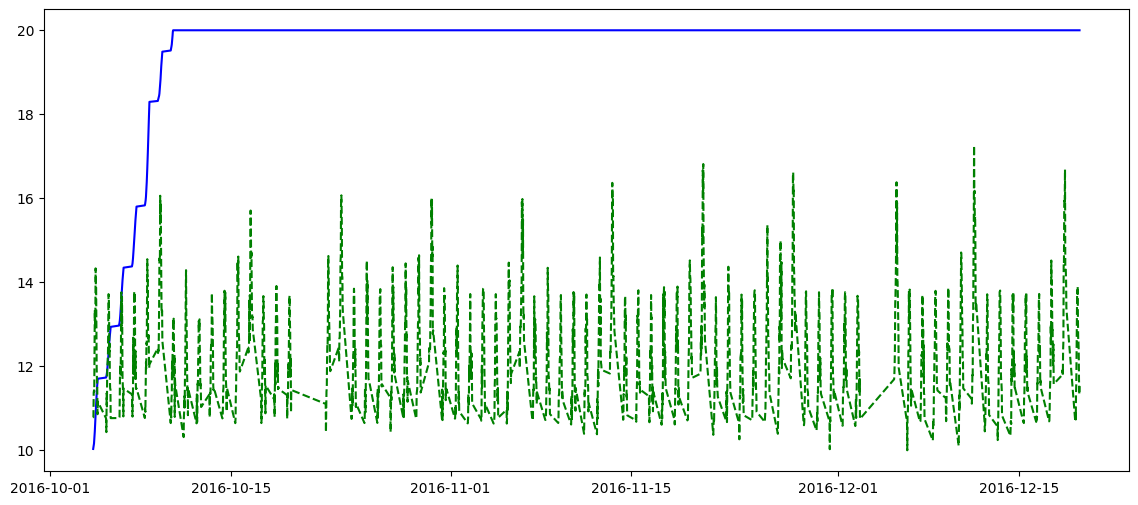

In [174]:
# Plot both models
plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['BaselinePrice'], label='Model 1: Linear', color='blue')
plt.plot(lot_data['Timestamp'], lot_data['Model2Price'], label='Model 2: Demand-Based', color='green', linestyle='--')

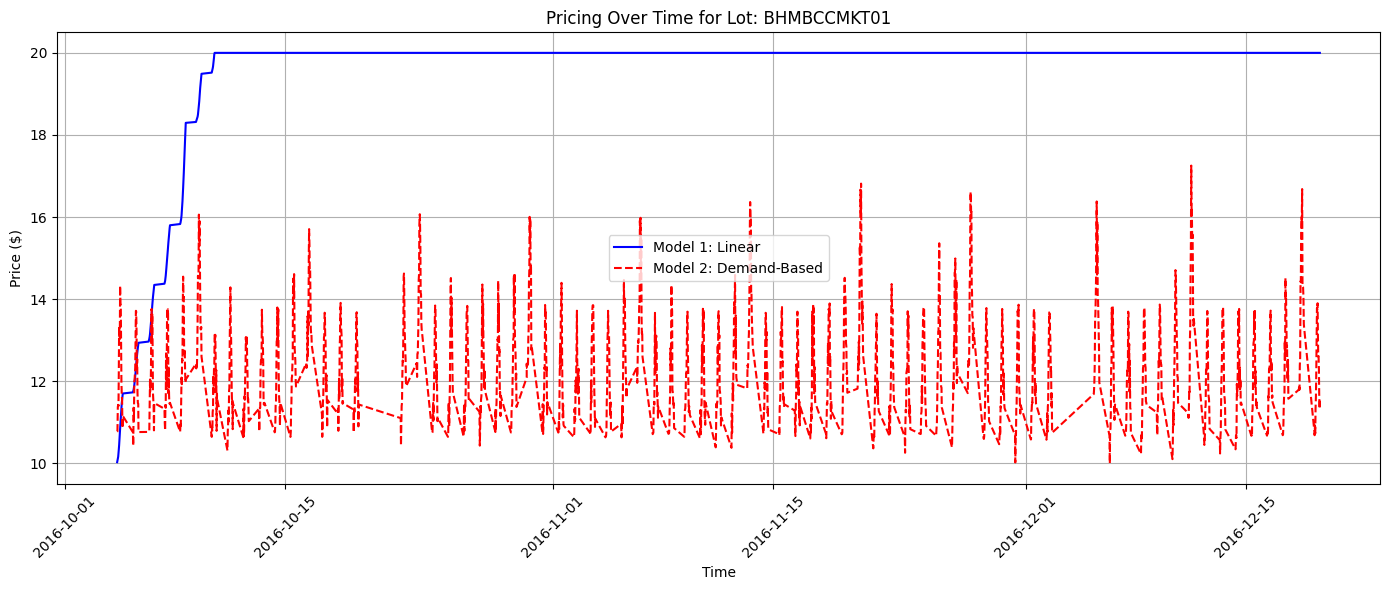

In [175]:
import matplotlib.pyplot as plt

sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot]

plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['BaselinePrice'], label='Model 1: Linear', color='blue')
plt.plot(lot_data['Timestamp'], lot_data['Model2Price'], label='Model 2: Demand-Based', color='red', linestyle='--')

plt.title(f"Pricing Over Time for Lot: {sample_lot}")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [176]:
# Step 1: Time-based features
df_model2['Hour'] = pd.to_datetime(df_model2['Timestamp']).dt.hour
df_model2['DayOfWeek'] = pd.to_datetime(df_model2['LastUpdatedDate'], format='%d-%m-%Y').dt.dayofweek

df_model2['IsOfficeHour'] = df_model2['Hour'].between(9, 17).astype(int)
df_model2['IsWeekend'] = df_model2['DayOfWeek'].isin([5, 6]).astype(int)

In [177]:
# New weights
zeta = 0.8  # weekend effect
eta = 0.6   # office hour effect

In [178]:
# Recompute raw demand with new terms
df_model2['RawDemand'] = (
    alpha   * df_model2['OccupancyRatio'] +
    beta    * df_model2['QueueLength'] -
    gamma   * df_model2['TrafficLevel'] +
    delta   * df_model2['IsSpecialDay'] +
    epsilon * df_model2['VehicleTypeWeight'] +
    zeta    * df_model2['IsWeekend'] +
    eta     * df_model2['IsOfficeHour']
)

In [179]:
# Normalize demand again
raw_min = df_model2['RawDemand'].min()
raw_max = df_model2['RawDemand'].max()
df_model2['NormalizedDemand'] = (df_model2['RawDemand'] - raw_min) / (raw_max - raw_min)


In [180]:
# Recalculate Model2Price
df_model2['Model2Price'] = base_price * (1 + lambda_ * df_model2['NormalizedDemand'])
df_model2['Model2Price'] = df_model2['Model2Price'].clip(lower=min_price, upper=max_price)

In [181]:
# Revenue for Model 2
df_model2['Model2Revenue'] = df_model2['Model2Price'] * df_model2['Occupancy']

In [182]:
# Preview
df_model2[['Timestamp', 'IsWeekend', 'IsOfficeHour', 'RawDemand', 'NormalizedDemand', 'Model2Price']].head()

,Timestamp,IsWeekend,IsOfficeHour,RawDemand,NormalizedDemand,Model2Price
0,2016-10-04 07:59:00,0,0,0.805719,0.072114,10.721141
1,2016-10-04 08:25:00,0,0,0.810919,0.072660,10.726602
2,2016-10-04 08:59:00,0,0,1.338648,0.128084,11.280836
3,2016-10-04 09:32:00,0,1,1.985442,0.196011,11.960114
4,2016-10-04 09:59:00,0,1,1.959965,0.193336,11.933358


In [183]:
# Backup
df_model2['Model2Price_PreEnhancement'] = df_model2['Model2Price']

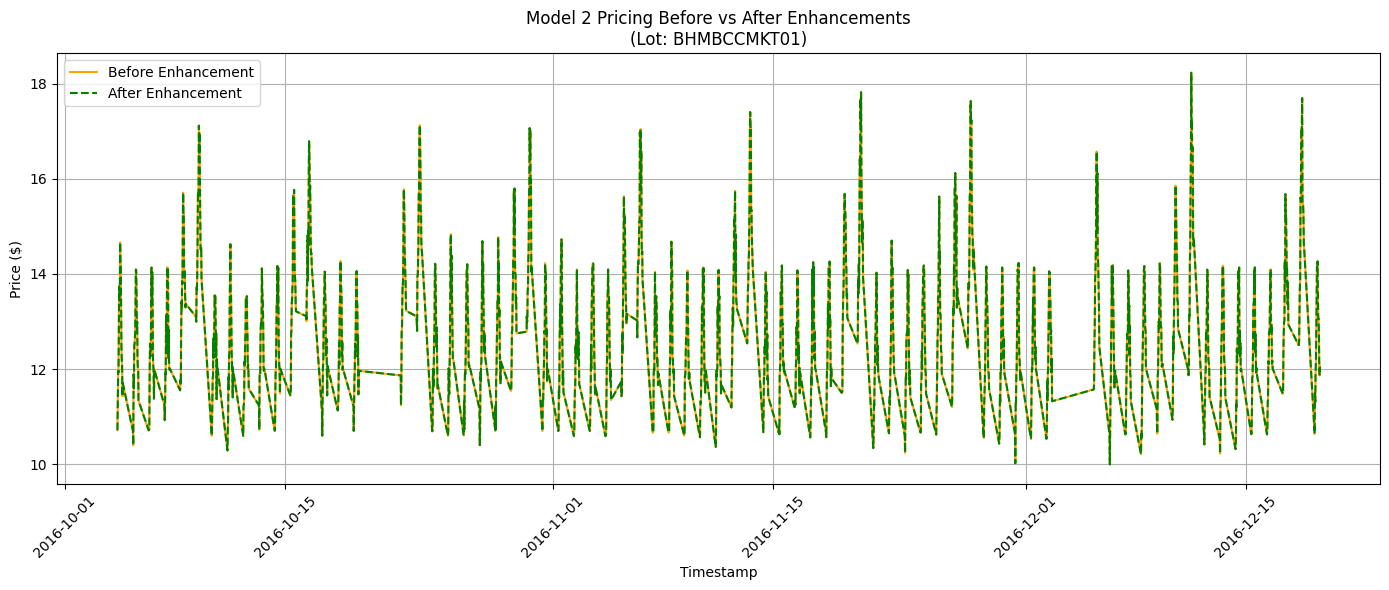

In [184]:
import matplotlib.pyplot as plt

# Pick a parking lot
sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot]

plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['Model2Price_PreEnhancement'], label='Before Enhancement', color='orange')
plt.plot(lot_data['Timestamp'], lot_data['Model2Price'], label='After Enhancement', color='green', linestyle='--')

plt.title(f"Model 2 Pricing Before vs After Enhancements\n(Lot: {sample_lot})")
plt.xlabel("Timestamp")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

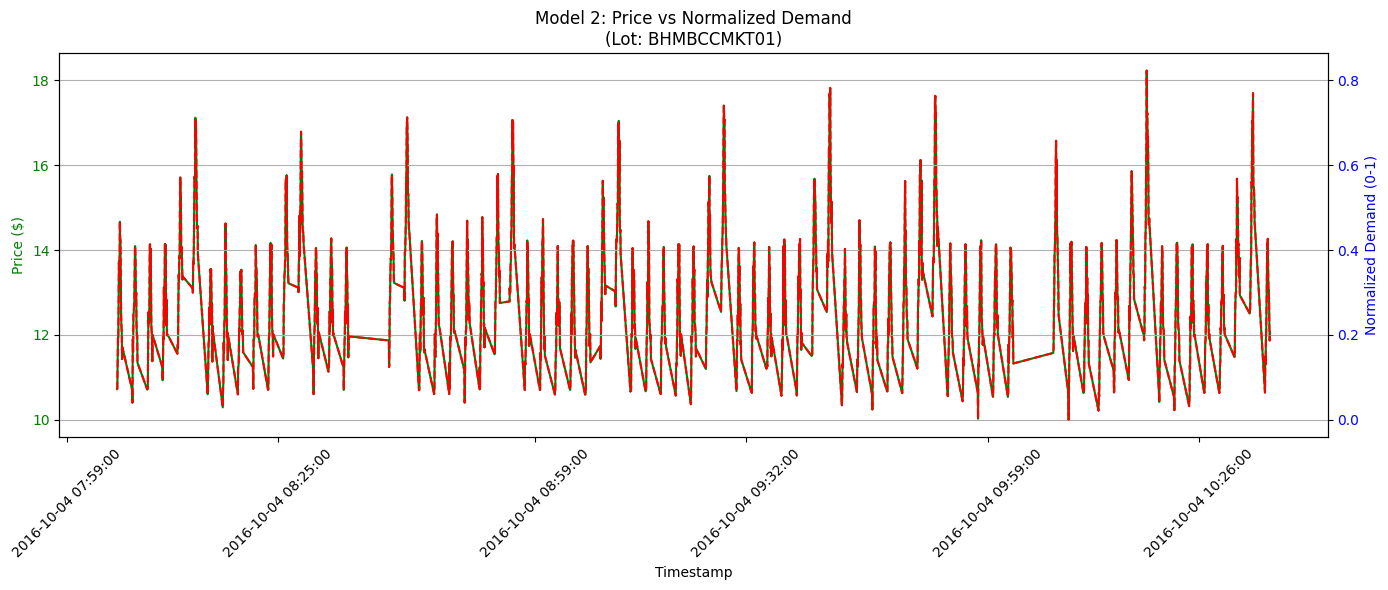

In [185]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Price line
ax1.plot(lot_data['Timestamp'], lot_data['Model2Price'], color='green', label='Model2 Price')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Price ($)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticklabels(lot_data['Timestamp'], rotation=45)

# Demand line on secondary axis
ax2 = ax1.twinx()
ax2.plot(lot_data['Timestamp'], lot_data['NormalizedDemand'], color='red', linestyle='--', label='Normalized Demand')
ax2.set_ylabel('Normalized Demand (0-1)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and layout
plt.title(f"Model 2: Price vs Normalized Demand\n(Lot: {sample_lot})")
fig.tight_layout()
plt.grid(True)
plt.show()

In [186]:
# Choosen relevant output columns
model2_export = df_model2[[
    'SystemCodeNumber', 'Timestamp', 'Occupancy', 'Capacity',
    'QueueLength', 'TrafficConditionNearby', 'IsSpecialDay', 'VehicleType',
    'IsWeekend', 'IsOfficeHour', 'Model2Price', 'Model2Revenue'
]]

# Export to CSV
model2_export.to_csv("model2.csv", index=False)

## Bokeh Plot: Model2Price + NormalizedDemand

In [187]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.layouts import column

output_notebook()

In [188]:
# Sample parking lot
sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot]

In [189]:
# Prepare Bokeh data source
source = ColumnDataSource(lot_data)

In [190]:
# Create figure with datetime x-axis
p = figure(
    x_axis_type="datetime",
    title=f"Enhanced Model 2: Price vs Normalized Demand (Lot: {sample_lot})",
    width=1000,
    height=400
)

In [191]:
# Left Y-axis: Model2 Price
p.line(x='Timestamp', y='Model2Price', source=source, color='green', line_width=2, legend_label="Model2 Price")
p.scatter(x='Timestamp', y='Model2Price', source=source, size=4, color='green')
# Changed circle() to scatter()

GlyphRenderer(id='17c85d32-6436-49ba-8efb-d35ea103977c', ...)

In [192]:
# Right Y-axis: Normalized Demand
p.extra_y_ranges = {"demand": Range1d(start=0, end=1.1)}
p.add_layout(LinearAxis(y_range_name="demand", axis_label="Normalized Demand"), 'right')
p.line(x='Timestamp', y='NormalizedDemand', source=source, y_range_name="demand", color='blue', line_dash='dashed', line_width=2, legend_label="Normalized Demand")

GlyphRenderer(id='17ffcc4b-d0f4-436c-8dec-3033d5ddda7d', ...)

In [193]:
# Labels & styling
p.yaxis.axis_label = "Price ($)"
p.xaxis.axis_label = "Time"
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.grid.grid_line_alpha = 0.3

In [194]:
show(p)

## Model 2: Demand-Based Dynamic Pricing

---

### Objective

To develop a smart, real-time pricing model that dynamically adjusts parking fees based on multiple **demand indicators**, capturing real-world behavior more effectively than the baseline (Model 1).

---

### Key Features Used

| Feature                 | Purpose                                           |
| ----------------------- | ------------------------------------------------- |
| **Occupancy Ratio**     | Core signal of space utilization                  |
| **Queue Length**        | Reflects pending demand                           |
| **Traffic Conditions**  | External congestion may reduce lot attractiveness |
| **Special Day Flag**    | Events/holidays drive demand surges               |
| **Vehicle Type Weight** | Larger vehicles consume more space                |
| **Weekend Indicator**   | Higher recreational demand on weekends            |
| **Office Hour Flag**    | Captures peak weekday usage (9 AM – 5 PM)         |

---

### Demand Function

The **Raw Demand** is calculated as:

$$
\text{Demand}_t = \alpha \cdot \left(\frac{\text{Occupancy}}{\text{Capacity}}\right) + \beta \cdot \text{QueueLength} - \gamma \cdot \text{TrafficLevel} + \delta \cdot \text{IsSpecialDay} + \epsilon \cdot \text{VehicleTypeWeight} + \zeta \cdot \text{IsWeekend} + \eta \cdot \text{IsOfficeHour}
$$

---

### Parameter Weights

| Symbol | Feature             | Value |
| ------ | ------------------- | ----- |
| α      | Occupancy Ratio     | 1.0   |
| β      | Queue Length        | 0.5   |
| γ      | Traffic Level       | 0.3   |
| δ      | Special Day         | 1.0   |
| ε      | Vehicle Type Weight | 0.2   |
| ζ      | Weekend             | 0.8   |
| η      | Office Hour         | 0.6   |

---

### Normalization & Pricing Formula

After computing `RawDemand`, it is **normalized using Min-Max Scaling**:

$$
\text{NormalizedDemand} = \frac{\text{Demand} - \min}{\max - \min}
$$

Then the **final dynamic price** is calculated as:

$$
\text{Price}_t = \text{BasePrice} \cdot (1 + \lambda \cdot \text{NormalizedDemand})
$$

Where:

* **BasePrice = \$10.0**
* **λ (lambda) = 1.0**
* Final price is **clipped between \$5 and \$20**

---

### Output Columns

| Column                      | Description                       |
| --------------------------- | --------------------------------- |
| `Model2Price`               | Final dynamic price per timestamp |
| `NormalizedDemand`          | Scaled demand score (0 to 1)      |
| `Model2Revenue`             | Revenue = Price × Occupancy       |
| `IsWeekend`, `IsOfficeHour` | Behavior flags for demand         |

---

### Visualizations

* Line chart comparing `Model1Price` and `Model2Price`
* Overlay of `Model2Price` and `NormalizedDemand` using **Bokeh**

---

### Benefits Over Model 1

* Captures real-world patterns (weekends, office hours)
* Handles multiple demand drivers
* Produces more adaptive and profitable pricing

---

# Model 3 : Competitive Pricing Model

## Compute Lot-to-Lot Distance Matrix

In [195]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate distance between two points on Earth (in km)
    """
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2.0)**2
    return R * 2 * np.arcsin(np.sqrt(a))

In [196]:
lot_coords = df_model2.groupby('SystemCodeNumber')[['Latitude', 'Longitude']].first().reset_index()

radius_km = 2.0  # 2 km range
neighbor_dict = {}

for i, row1 in lot_coords.iterrows():
    neighbors = []
    for j, row2 in lot_coords.iterrows():
        if row1['SystemCodeNumber'] == row2['SystemCodeNumber']:
            continue
        distance = haversine(row1['Latitude'], row1['Longitude'], row2['Latitude'], row2['Longitude'])
        if distance <= radius_km:
            neighbors.append(row2['SystemCodeNumber'])
    neighbor_dict[row1['SystemCodeNumber']] = neighbors

In [197]:
# nearby lots
for lot_id in list(neighbor_dict.keys())[:5]:
    print(f"Lot {lot_id} has {len(neighbor_dict[lot_id])} competitors: {neighbor_dict[lot_id]}")


Lot BHMBCCMKT01 has 12 competitors: ['BHMBCCTHL01', 'BHMEURBRD01', 'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8', 'Others-CCCPS98', 'Shopping']
Lot BHMBCCTHL01 has 12 competitors: ['BHMBCCMKT01', 'BHMEURBRD01', 'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8', 'Others-CCCPS98', 'Shopping']
Lot BHMEURBRD01 has 12 competitors: ['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8', 'Others-CCCPS98', 'Shopping']
Lot BHMMBMMBX01 has 0 competitors: []
Lot BHMNCPHST01 has 12 competitors: ['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8', 'Others-CCCPS98', 'Shopping']


## For Each Row, Calculate Competitor Averages

In [198]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

lot_coords = df_model2.groupby('SystemCodeNumber')[['Latitude', 'Longitude']].first().reset_index()

neighbor_dict = {}
radius_km = 2.0

for i, lot1 in lot_coords.iterrows():
    neighbors = []
    for j, lot2 in lot_coords.iterrows():
        if lot1['SystemCodeNumber'] == lot2['SystemCodeNumber']:
            continue
        distance = haversine(lot1['Latitude'], lot1['Longitude'], lot2['Latitude'], lot2['Longitude'])
        if distance <= radius_km:
            neighbors.append(lot2['SystemCodeNumber'])
    neighbor_dict[lot1['SystemCodeNumber']] = neighbors

In [199]:
from tqdm import tqdm
import numpy as np

df_model2['NearbyAvgPrice'] = np.nan
df_model2['NearbyAvgOccupancyRatio'] = np.nan

for idx in tqdm(df_model2.index):
    row = df_model2.loc[idx]
    lot_id = row['SystemCodeNumber']
    timestamp = row['Timestamp']
    neighbors = neighbor_dict.get(lot_id, [])

    competitors = df_model2[
        (df_model2['SystemCodeNumber'].isin(neighbors)) &
        (df_model2['Timestamp'] == timestamp)
    ]

    if not competitors.empty:
        df_model2.at[idx, 'NearbyAvgPrice'] = competitors['Model2Price'].mean()
        df_model2.at[idx, 'NearbyAvgOccupancyRatio'] = (competitors['Occupancy'] / competitors['Capacity']).mean()
    else:
        df_model2.at[idx, 'NearbyAvgPrice'] = row['Model2Price']
        df_model2.at[idx, 'NearbyAvgOccupancyRatio'] = row['Occupancy'] / row['Capacity']


100%|██████████| 18368/18368 [00:40<00:00, 451.43it/s]


In [200]:
df_model2[['SystemCodeNumber', 'Timestamp', 'Model2Price', 'NearbyAvgPrice', 'Occupancy', 'NearbyAvgOccupancyRatio']].head(10)

,SystemCodeNumber,Timestamp,Model2Price,NearbyAvgPrice,Occupancy,NearbyAvgOccupancyRatio
0,BHMBCCMKT01,2016-10-04 07:59:00,10.721141,11.336596,61,0.271742
1,BHMBCCMKT01,2016-10-04 08:25:00,10.726602,11.446810,64,0.330019
2,BHMBCCMKT01,2016-10-04 08:59:00,11.280836,11.670132,80,0.417660
3,BHMBCCMKT01,2016-10-04 09:32:00,11.960114,12.610956,107,0.508493
4,BHMBCCMKT01,2016-10-04 09:59:00,11.933358,12.703115,150,0.572911
5,BHMBCCMKT01,2016-10-04 10:26:00,12.612636,13.268749,177,0.619829
6,BHMBCCMKT01,2016-10-04 10:59:00,13.739306,13.623605,219,0.666048
7,BHMBCCMKT01,2016-10-04 11:25:00,13.475203,14.240657,247,0.681926
8,BHMBCCMKT01,2016-10-04 11:59:00,13.434031,14.251257,259,0.692018
9,BHMBCCMKT01,2016-10-04 12:29:00,14.665031,15.609927,266,0.695715


## Model 3 Final Price Formula

$$
\text{Model3Price} = 0.6 \cdot \text{Model2Price} + 0.4 \cdot \text{NearbyAvgPrice} + \beta \cdot \text{NearbyAvgOccupancyRatio}
$$

* Where **β = 2.0** (This gives a boost if surrounding lots are full)
* We'll also clip the price to stay between **\$5.00 and \$20.00**

---

In [201]:
beta = 2.0

df_model2['Model3Price'] = (
    0.6 * df_model2['Model2Price'] +
    0.4 * df_model2['NearbyAvgPrice'] +
    beta * df_model2['NearbyAvgOccupancyRatio']
)

df_model2['Model3Price'] = df_model2['Model3Price'].clip(lower=5.0, upper=20.0)

In [202]:
df_model2['Model3Revenue'] = df_model2['Model3Price'] * df_model2['Occupancy']

In [203]:
df_model2[['SystemCodeNumber', 'Timestamp', 'Model2Price', 'Model3Price', 'Model3Revenue']].head(10)

,SystemCodeNumber,Timestamp,Model2Price,Model3Price,Model3Revenue
0,BHMBCCMKT01,2016-10-04 07:59:00,10.721141,11.510807,702.159216
1,BHMBCCMKT01,2016-10-04 08:25:00,10.726602,11.674723,747.182274
2,BHMBCCMKT01,2016-10-04 08:59:00,11.280836,12.271875,981.750003
3,BHMBCCMKT01,2016-10-04 09:32:00,11.960114,13.237437,1416.405774
4,BHMBCCMKT01,2016-10-04 09:59:00,11.933358,13.387083,2008.062449
5,BHMBCCMKT01,2016-10-04 10:26:00,12.612636,14.114739,2498.308861
6,BHMBCCMKT01,2016-10-04 10:59:00,13.739306,15.025122,3290.501769
7,BHMBCCMKT01,2016-10-04 11:25:00,13.475203,15.145236,3740.873205
8,BHMBCCMKT01,2016-10-04 11:59:00,13.434031,15.144958,3922.544132
9,BHMBCCMKT01,2016-10-04 12:29:00,14.665031,16.434419,4371.555491


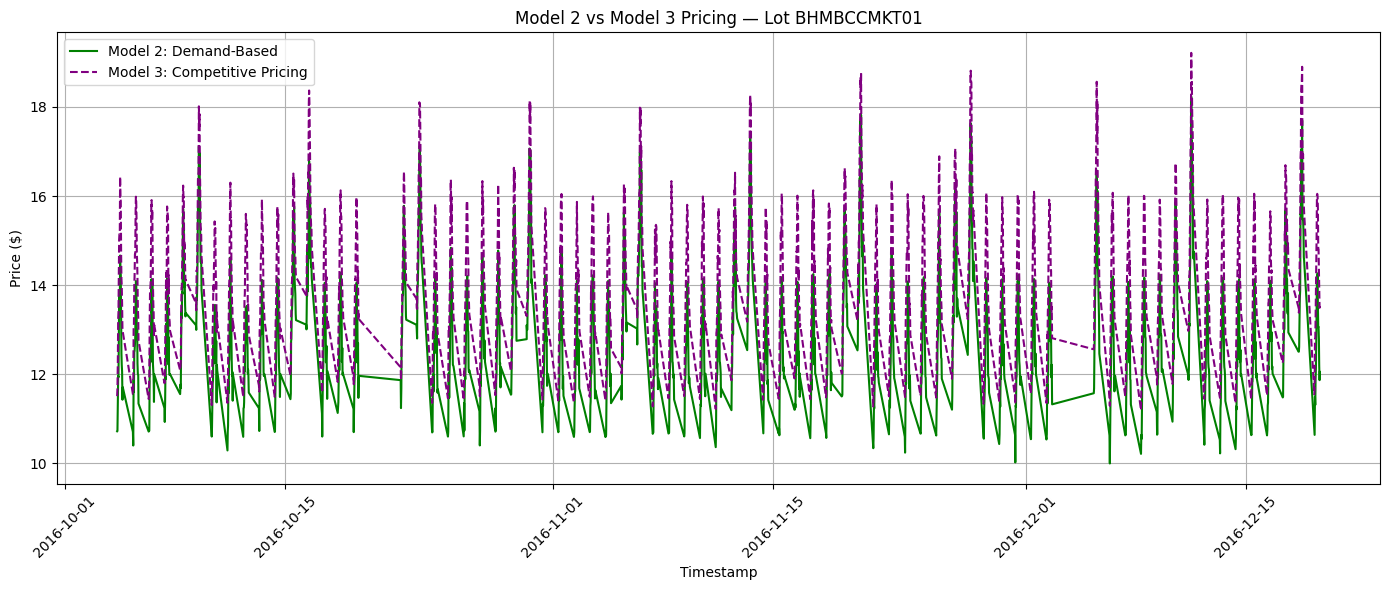

In [204]:
# Model2Price vs Model3Price
import matplotlib.pyplot as plt

# Pick parking lot
sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot]

plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['Model2Price'], label='Model 2: Demand-Based', color='green')
plt.plot(lot_data['Timestamp'], lot_data['Model3Price'], label='Model 3: Competitive Pricing', color='purple', linestyle='--')

plt.title(f"Model 2 vs Model 3 Pricing — Lot {sample_lot}")
plt.xlabel("Timestamp")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [205]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot].copy()

lot_data['Timestamp'] = pd.to_datetime(lot_data['Timestamp'])

source = ColumnDataSource(lot_data)

p = figure(x_axis_type="datetime", title=f"Model 2 vs Model 3 Pricing — Lot {sample_lot}", width=1000, height=400)

p.line(x='Timestamp', y='Model2Price', source=source, color='green', line_width=2, legend_label='Model 2 Price')

p.line(x='Timestamp', y='Model3Price', source=source, color='purple', line_width=2, line_dash='dashed', legend_label='Model 3 Price')

p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price ($)"
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.grid.grid_line_alpha = 0.3

show(p)

In [206]:
#CSV Exporting
model3_export = df_model2[[
    'SystemCodeNumber', 'Timestamp', 'Occupancy', 'Capacity',
    'Model1Price' if 'Model1Price' in df_model2.columns else 'BaselinePrice',
    'Model2Price', 'Model3Price', 'Model3Revenue',
    'NearbyAvgPrice', 'NearbyAvgOccupancyRatio'
]]

model3_export.to_csv("model3.csv", index=False)

## Price vs Occupancy Plot for Model 3

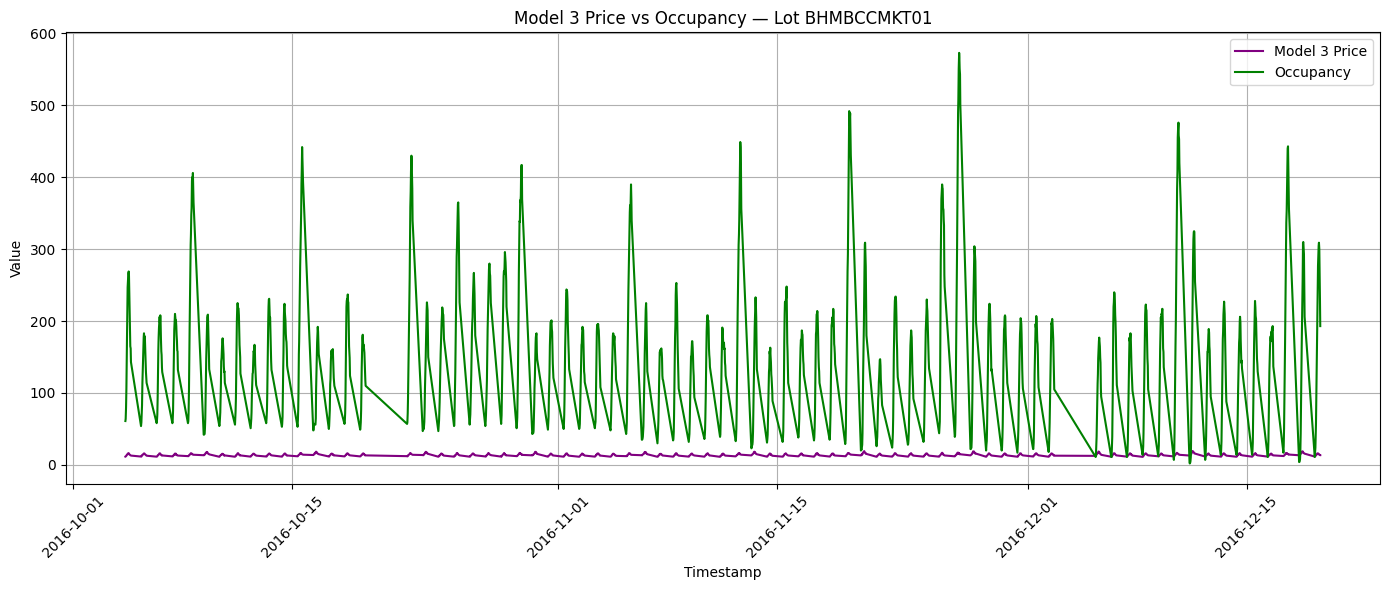

In [207]:
plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['Model3Price'], label='Model 3 Price', color='purple')
plt.plot(lot_data['Timestamp'], lot_data['Occupancy'], label='Occupancy', color='green')

plt.title(f"Model 3 Price vs Occupancy — Lot {sample_lot}")
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Model 3: Competitive Pricing

---

### Objective

To enhance the dynamic pricing strategy by making it location-aware and competitor-sensitive. This model adjusts parking prices in real time based on the prices and occupancy levels of nearby lots, simulating real-world business competition.

---

### Core Idea

> “Don’t just respond to your own demand adapt your price based on what your neighbors are doing.”

---

### Key Concepts

| Feature                   | Description                                      |
| ------------------------- | ------------------------------------------------ |
| `Latitude & Longitude`    | Used to find nearby parking lots                 |
| `NearbyAvgPrice`          | Average Model 2 price of competitors within 2 km |
| `NearbyAvgOccupancyRatio` | Avg occupancy ratio (demand) of nearby lots      |
| `Model2Price`             | Price based on demand from Model 2               |

---

### Competitive Pricing Logic

The final Model 3 price is calculated as:

$$
\text{Model3Price} = 0.6 \cdot \text{Model2Price} + 0.4 \cdot \text{NearbyAvgPrice} + \beta \cdot \text{NearbyAvgOccupancyRatio}
$$

* **β = 2.0** (tunable weight for competitor occupancy pressure)
* Final price is **clipped between \$5 \ and \$20**

---

### Interpretation

| Situation                             | Pricing Behavior                               |
| ------------------------------------- | -----------------------------------------------|
| Nearby lots are full + expensive      | Raise price — stay competitive yet profitable |
| Nearby lots are empty + cheap         | Lower price — attract demand or reroute       |
| Your lot is empty but others are full | Moderate — follow competitor trend            |

---

### Features Engineered

| Feature                         | Column                                    |
| ------------------------------- | ----------------------------------------- |
| Distance-based neighbor mapping | `neighbor_dict`                           |
| Nearby average price            | `NearbyAvgPrice`                          |
| Nearby average demand           | `NearbyAvgOccupancyRatio`                 |
| Final competitive price         | `Model3Price`                             |
| Revenue estimate                | `Model3Revenue = Model3Price × Occupancy` |

---

### Visualizations

* Model 2 vs Model 3 price trends (Matplotlib & Bokeh)
* Price vs Occupancy patterns
* Location-driven pricing behavior

---

### Key Advantages

* **Simulates market competition**
* Uses **geospatial intelligence** for dynamic pricing
* Adds **business logic** and real-world adaptability
* Avoids overpricing or underpricing in a dense parking network

---

## Summary: Model 1 vs Model 2 vs Model 3

| Feature / Behavior                      | Model 1: Baseline Linear | Model 2: Demand-Based                                                   | Model 3: Competitive Pricing                        |
| --------------------------------------- | ------------------------ | ----------------------------------------------------------------------- | --------------------------------------------------- |
| **Inputs Used**                         | Occupancy                | Occupancy, Queue, Traffic, SpecialDay, VehicleType, Weekend, OfficeHour | All Model 2 inputs + Nearby lots (price, occupancy) |
| **Time-Aware?**                         |  No                     |  Yes (office hours, weekend)                                           |  Yes                                               |
| **Location-Aware?**                     |  No                     |  No                                                                    |  Yes (lat-long neighbors)                          |
| **Price Adjusts with Local Demand?**    |  Basic (linearly)       |  Smartly                                                               |  Smart + competitive                               |
| **Price Influenced by Competitors?**    |  No                     |  No                                                                    |  Yes                                               |
| **Complexity Level**                    | ⭐ (Simple)               | ⭐⭐⭐ (Intermediate)                                                      | ⭐⭐⭐⭐ (Advanced, realistic)                          |
| **Revenue Estimation**                  | Yes                        | Yes                                                                     | Yes                                                  |
| **Adaptability to Real-World Use Case** | Limited                | Strong                                                                | Excellent (market-driven)                         |

---

# Real-Time Simulation with Pathway

In [208]:
!pip install pathway bokeh --quiet

In [209]:
!pip install -U pathway

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

In [211]:
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,2016-10-04 09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00,2016-12-19 14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00,2016-12-19 15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00,2016-12-19 15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00,2016-12-19 16:03:00


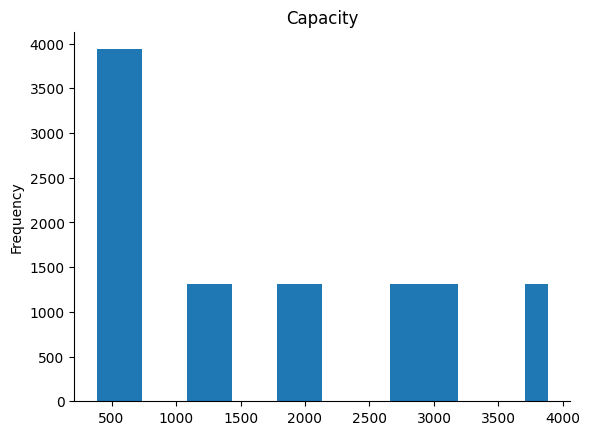

In [212]:
from matplotlib import pyplot as plt
df['Capacity'].plot(kind='hist', bins=20, title='Capacity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [213]:
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

df = df.sort_values('Timestamp').reset_index(drop=True)

In [214]:
# Save the selected columns to a CSV file for streaming or downstream processing
df[["Timestamp", "Occupancy", "Capacity"]].to_csv("parking_stream.csv", index=False)

# Model Performance Evaluation & Comparison


### 1. Revenue Performance Comparison

# Calculate total revenue for each model

In [215]:
model1_total_revenue = df_sorted['Revenue'].sum()
model2_total_revenue = df_model2['Model2Revenue'].sum()
model3_total_revenue = df_model2['Model3Revenue'].sum()

print("=== REVENUE PERFORMANCE COMPARISON ===")
print(f"Model 1 (Baseline): ${model1_total_revenue:,.2f}")
print(f"Model 2 (Demand-Based): ${model2_total_revenue:,.2f}")
print(f"Model 3 (Competitive): ${model3_total_revenue:,.2f}")
print(f"\nRevenue Improvement:")
print(f"Model 2 vs Model 1: {((model2_total_revenue/model1_total_revenue - 1) * 100):.2f}%")
print(f"Model 3 vs Model 1: {((model3_total_revenue/model1_total_revenue - 1) * 100):.2f}%")
print(f"Model 3 vs Model 2: {((model3_total_revenue/model2_total_revenue - 1) * 100):.2f}%")

=== REVENUE PERFORMANCE COMPARISON ===
Model 1 (Baseline): $264,884,048.56
Model 2 (Demand-Based): $188,203,234.48
Model 3 (Competitive): $201,525,149.30

Revenue Improvement:
Model 2 vs Model 1: -28.95%
Model 3 vs Model 1: -23.92%
Model 3 vs Model 2: 7.08%


### 2. Occupancy Optimization Analysis

In [216]:
# Calculate average occupancy rates and utilization efficiency
def calculate_utilization_metrics(df, price_col, revenue_col):
    """Calculate occupancy utilization metrics"""
    avg_occupancy_rate = (df['Occupancy'] / df['Capacity']).mean()
    avg_price = df[price_col].mean()
    revenue_per_space = df[revenue_col].sum() / df['Capacity'].sum()
    price_volatility = df[price_col].std() / df[price_col].mean()

    return {
        'avg_occupancy_rate': avg_occupancy_rate,
        'avg_price': avg_price,
        'revenue_per_space': revenue_per_space,
        'price_volatility': price_volatility
    }

# Calculate metrics for each model
model1_metrics = calculate_utilization_metrics(df_sorted, 'BaselinePrice', 'Revenue')
model2_metrics = calculate_utilization_metrics(df_model2, 'Model2Price', 'Model2Revenue')
model3_metrics = calculate_utilization_metrics(df_model2, 'Model3Price', 'Model3Revenue')

In [217]:
print("\n=== OCCUPANCY & UTILIZATION METRICS ===")
print(f"{'Metric':<25} {'Model 1':<12} {'Model 2':<12} {'Model 3':<12}")
print("-" * 65)
print(f"{'Avg Occupancy Rate':<25} {model1_metrics['avg_occupancy_rate']:.3f}     {model2_metrics['avg_occupancy_rate']:.3f}     {model3_metrics['avg_occupancy_rate']:.3f}")
print(f"{'Avg Price ($)':<25} {model1_metrics['avg_price']:.2f}     {model2_metrics['avg_price']:.2f}     {model3_metrics['avg_price']:.2f}")
print(f"{'Revenue per Space ($)':<25} {model1_metrics['revenue_per_space']:.2f}     {model2_metrics['revenue_per_space']:.2f}     {model3_metrics['revenue_per_space']:.2f}")
print(f"{'Price Volatility':<25} {model1_metrics['price_volatility']:.3f}     {model2_metrics['price_volatility']:.3f}     {model3_metrics['price_volatility']:.3f}")



=== OCCUPANCY & UTILIZATION METRICS ===
Metric                    Model 1      Model 2      Model 3     
-----------------------------------------------------------------
Avg Occupancy Rate        0.509     0.509     0.509
Avg Price ($)             19.72     13.69     14.71
Revenue per Space ($)     8.98     6.38     6.83
Price Volatility          0.067     0.114     0.109


### 3. Price Stability Analysis

In [218]:
# Calculate price stability metrics
def calculate_price_stability(df, price_col):
    """Calculate price stability metrics"""
    price_changes = df[price_col].diff().abs()
    max_price_change = price_changes.max()
    avg_price_change = price_changes.mean()
    price_change_std = price_changes.std()

    return {
        'max_price_change': max_price_change,
        'avg_price_change': avg_price_change,
        'price_change_std': price_change_std
    }

model1_stability = calculate_price_stability(df_sorted, 'BaselinePrice')
model2_stability = calculate_price_stability(df_model2, 'Model2Price')
model3_stability = calculate_price_stability(df_model2, 'Model3Price')

print("\n=== PRICE STABILITY ANALYSIS ===")
print(f"{'Metric':<25} {'Model 1':<12} {'Model 2':<12} {'Model 3':<12}")
print("-" * 65)
print(f"{'Max Price Change ($)':<25} {model1_stability['max_price_change']:.3f}     {model2_stability['max_price_change']:.3f}     {model3_stability['max_price_change']:.3f}")
print(f"{'Avg Price Change ($)':<25} {model1_stability['avg_price_change']:.3f}     {model2_stability['avg_price_change']:.3f}     {model3_stability['avg_price_change']:.3f}")
print(f"{'Price Change Std ($)':<25} {model1_stability['price_change_std']:.3f}     {model2_stability['price_change_std']:.3f}     {model3_stability['price_change_std']:.3f}")



=== PRICE STABILITY ANALYSIS ===
Metric                    Model 1      Model 2      Model 3     
-----------------------------------------------------------------
Max Price Change ($)      9.979     4.578     4.910
Avg Price Change ($)      0.015     0.594     0.593
Price Change Std ($)      0.266     0.555     0.548


### 4. Visual Performance Comparison

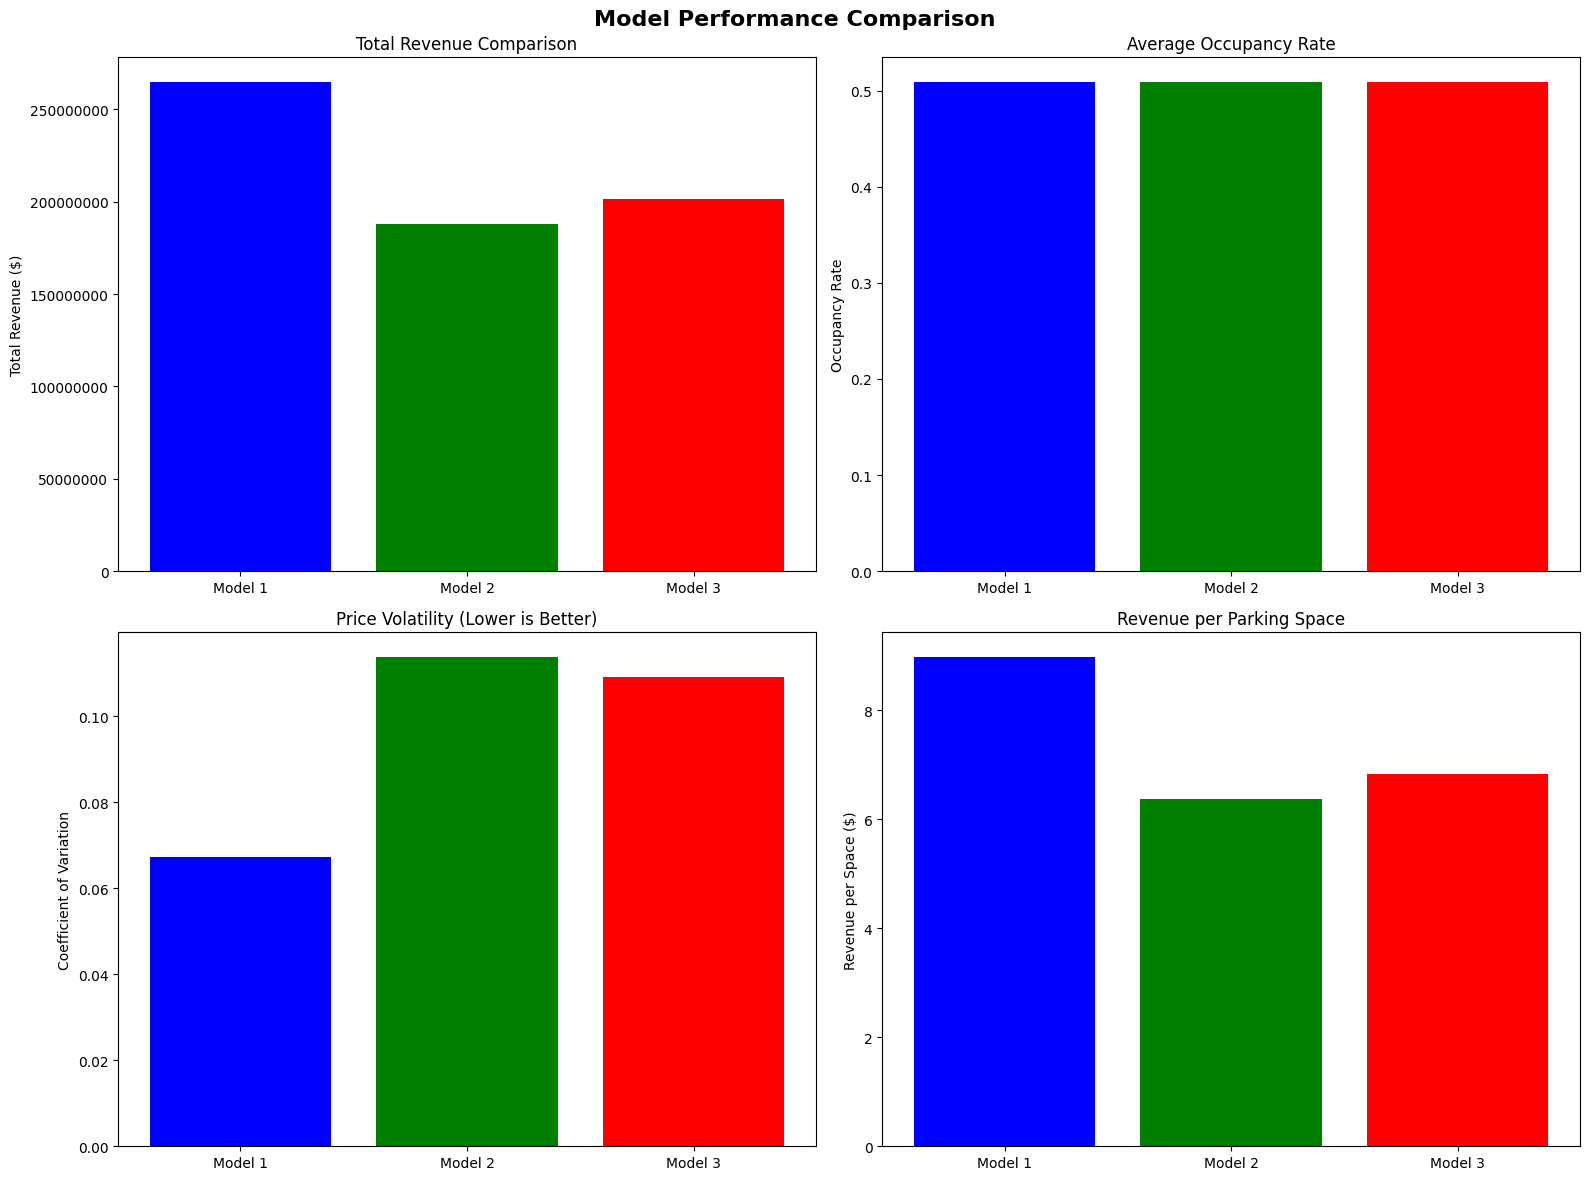

In [219]:
# Create comprehensive performance comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Revenue comparison
axes[0, 0].bar(['Model 1', 'Model 2', 'Model 3'],
               [model1_total_revenue, model2_total_revenue, model3_total_revenue],
               color=['blue', 'green', 'red'])
axes[0, 0].set_title('Total Revenue Comparison')
axes[0, 0].set_ylabel('Total Revenue ($)')
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Occupancy rate comparison
axes[0, 1].bar(['Model 1', 'Model 2', 'Model 3'],
               [model1_metrics['avg_occupancy_rate'], model2_metrics['avg_occupancy_rate'], model3_metrics['avg_occupancy_rate']],
               color=['blue', 'green', 'red'])
axes[0, 1].set_title('Average Occupancy Rate')
axes[0, 1].set_ylabel('Occupancy Rate')

# Price volatility comparison
axes[1, 0].bar(['Model 1', 'Model 2', 'Model 3'],
               [model1_metrics['price_volatility'], model2_metrics['price_volatility'], model3_metrics['price_volatility']],
               color=['blue', 'green', 'red'])
axes[1, 0].set_title('Price Volatility (Lower is Better)')
axes[1, 0].set_ylabel('Coefficient of Variation')

# Revenue per space comparison
axes[1, 1].bar(['Model 1', 'Model 2', 'Model 3'],
               [model1_metrics['revenue_per_space'], model2_metrics['revenue_per_space'], model3_metrics['revenue_per_space']],
               color=['blue', 'green', 'red'])
axes[1, 1].set_title('Revenue per Parking Space')
axes[1, 1].set_ylabel('Revenue per Space ($)')

plt.tight_layout()
plt.show()

# Smart Rerouting System

## Intelligent Rerouting Recommendations

### 1. Rerouting Logic Implementation

In [220]:
def generate_rerouting_suggestions(df, lot_id, timestamp, max_distance_km=5.0, max_price_multiplier=1.5):
    """
    Generate intelligent rerouting suggestions for a specific lot and time.

    Parameters:
    - df: DataFrame with all parking data
    - lot_id: Current parking lot ID
    - timestamp: Current timestamp
    - max_distance_km: Maximum distance for suggestions (default 5km)
    - max_price_multiplier: Maximum price multiplier for suggestions (default 1.5x)

    Returns:
    - List of rerouting suggestions with reasons
    """

    # Get current lot data
    current_lot_data = df[(df['SystemCodeNumber'] == lot_id) & (df['Timestamp'] == timestamp)]

    if current_lot_data.empty:
        return []

    current_lot = current_lot_data.iloc[0]
    current_occupancy_ratio = current_lot['Occupancy'] / current_lot['Capacity']
    current_price = current_lot['Model3Price']  # Use Model 3 price as reference

    # Get coordinates of current lot
    current_lat = current_lot['Latitude']
    current_lon = current_lot['Longitude']

    # Find nearby lots within max_distance_km
    suggestions = []

    for _, lot in df[df['Timestamp'] == timestamp].iterrows():
        if lot['SystemCodeNumber'] == lot_id:
            continue

        # Calculate distance
        distance = haversine(current_lat, current_lon, lot['Latitude'], lot['Longitude'])

        if distance <= max_distance_km:
            lot_occupancy_ratio = lot['Occupancy'] / lot['Capacity']
            lot_price = lot['Model3Price']

            # Determine suggestion reason
            reason = ""
            priority = 0

            if lot_occupancy_ratio < 0.8 and lot_price <= current_price * max_price_multiplier:
                if lot_occupancy_ratio < 0.5:
                    reason = "Excellent alternative: Low occupancy, reasonable price"
                    priority = 1
                elif lot_occupancy_ratio < 0.7:
                    reason = "Good alternative: Moderate occupancy, competitive price"
                    priority = 2
                else:
                    reason = "Decent alternative: Available space, acceptable price"
                    priority = 3
            elif lot_occupancy_ratio < 0.9 and lot_price < current_price:
                reason = "Budget option: Higher occupancy but lower price"
                priority = 4
            elif lot_occupancy_ratio < 0.6:
                reason = "Space available: Low occupancy but higher price"
                priority = 5

            if reason:
                suggestions.append({
                    'lot_id': lot['SystemCodeNumber'],
                    'distance_km': distance,
                    'occupancy_ratio': lot_occupancy_ratio,
                    'price': lot_price,
                    'reason': reason,
                    'priority': priority
                })

    # Sort by priority and distance
    suggestions.sort(key=lambda x: (x['priority'], x['distance_km']))
    return suggestions[:5]  # Return top 5 suggestions

### 2. Test Rerouting System

In [221]:
# Test rerouting for a specific scenario
test_lot = df_model2['SystemCodeNumber'].iloc[0]
test_timestamp = df_model2['Timestamp'].iloc[1000]  # Pick a middle timestamp

print(f"=== REROUTING SUGGESTIONS ===")
print(f"Current Lot: {test_lot}")
print(f"Timestamp: {test_timestamp}")
print(f"Current Status:")

current_status = df_model2[(df_model2['SystemCodeNumber'] == test_lot) &
                          (df_model2['Timestamp'] == test_timestamp)].iloc[0]

print(f"  - Occupancy: {current_status['Occupancy']}/{current_status['Capacity']} ({current_status['Occupancy']/current_status['Capacity']:.1%})")
print(f"  - Current Price: ${current_status['Model3Price']:.2f}")
print(f"  - Traffic Condition: {current_status['TrafficConditionNearby']}")

suggestions = generate_rerouting_suggestions(df_model2, test_lot, test_timestamp)

if suggestions:
    print(f"\nTop Rerouting Suggestions:")
    for i, suggestion in enumerate(suggestions, 1):
        print(f"{i}. {suggestion['lot_id']} ({suggestion['distance_km']:.1f}km away)")
        print(f"   - Occupancy: {suggestion['occupancy_ratio']:.1%}")
        print(f"   - Price: ${suggestion['price']:.2f}")
        print(f"   - Reason: {suggestion['reason']}")
        print()
else:
    print("No suitable alternatives found within 5km radius.")

=== REROUTING SUGGESTIONS ===
Current Lot: BHMBCCMKT01
Timestamp: 2016-11-30 13:01:00
Current Status:
  - Occupancy: 204/577 (35.4%)
  - Current Price: $15.77
  - Traffic Condition: high

Top Rerouting Suggestions:
1. Others-CCCPS202 (0.9km away)
   - Occupancy: 46.6%
   - Price: $16.18
   - Reason: Excellent alternative: Low occupancy, reasonable price

2. Others-CCCPS98 (0.9km away)
   - Occupancy: 38.6%
   - Price: $16.14
   - Reason: Excellent alternative: Low occupancy, reasonable price

3. Others-CCCPS119a (0.9km away)
   - Occupancy: 23.7%
   - Price: $16.04
   - Reason: Excellent alternative: Low occupancy, reasonable price

4. BHMNCPNST01 (0.7km away)
   - Occupancy: 69.3%
   - Price: $15.23
   - Reason: Good alternative: Moderate occupancy, competitive price

5. Others-CCCPS8 (0.9km away)
   - Occupancy: 62.9%
   - Price: $16.25
   - Reason: Good alternative: Moderate occupancy, competitive price



In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [223]:
try:
    import pathway as pw
    import bokeh.plotting
    import panel as pn
    from bokeh.plotting import figure, show
    from bokeh.io import output_notebook
    from bokeh.models import HoverTool, ColorBar
    from bokeh.palettes import Viridis256
    from bokeh.transform import linear_cmap
    pathway_available = True
    print("Pathway and Bokeh imports successful!")
except ImportError as e:
    pathway_available = False
    print(f"Pathway/Bokeh not available: {e}")

Pathway and Bokeh imports successful!


In [224]:
def prepare_pathway_data(df):
    """Prepare data for Pathway streaming with error handling"""
    try:
        df = df.copy()

        # Ensure Timestamp column exists and is datetime
        if 'Timestamp' not in df.columns:
            raise ValueError("Timestamp column not found in dataframe")

        # Convert to datetime if not already
        if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])

        # Convert to string format for Pathway
        df['Timestamp'] = df['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

        # Required columns for Pathway
        required_cols = ['Timestamp', 'SystemCodeNumber', 'Occupancy', 'Capacity', 'QueueLength',
                        'TrafficConditionNearby', 'IsSpecialDay', 'VehicleType', 'Latitude', 'Longitude']

        # Add missing columns with defaults
        for col in required_cols:
            if col not in df.columns:
                if col == 'QueueLength':
                    df[col] = 0
                elif col == 'TrafficConditionNearby':
                    df[col] = 'Medium'
                elif col == 'IsSpecialDay':
                    df[col] = 0
                elif col == 'VehicleType':
                    df[col] = 'car'
                elif col in ['Latitude', 'Longitude']:
                    df[col] = 0.0
                else:
                    df[col] = ''

        # Save for Pathway
        df.to_csv("parking_stream.csv", index=False)
        print(f"Prepared {len(df)} rows for Pathway streaming")
        return df

    except Exception as e:
        print(f"Error preparing Pathway data: {e}")
        return None


In [225]:
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,19-12-2016,16:30:00,2016-12-19 16:30:00


In [226]:
def calculate_model1_price(occupancy, capacity, base_price=10.0, alpha=0.1):
    """Calculate Model 1 (Baseline) price"""
    try:
        if capacity <= 0:
            return base_price
        occupancy_ratio = occupancy / capacity
        return base_price + alpha * occupancy_ratio
    except Exception as e:
        print(f"Error in Model 1 calculation: {e}")
        return base_price

In [227]:
base_price

10.0

In [228]:
def calculate_model2_price(occupancy, capacity, queue_length, traffic, special, vehicle, base_price=10.0, lambda_=1.0):
    """Calculate Model 2 (Demand-Based) price"""
    try:
        if capacity <= 0:
            return base_price

        alpha, beta, gamma, delta, epsilon = 1.0, 0.5, 0.3, 1.0, 0.2
        vehicle_weights = {'car': 1.0, 'bike': 0.7, 'truck': 1.3}
        v_weight = vehicle_weights.get(str(vehicle).lower(), 1.0)

        occ = occupancy / capacity
        queue = min(queue_length / 10.0, 1.0) if queue_length > 0 else 0
        traffic_factor = 1.0 if str(traffic).lower() == 'low' else 0.7

        demand = (alpha * occ + beta * queue - gamma * traffic_factor + delta * special + epsilon * v_weight)
        norm_demand = max(0, min(1, demand / 3.0))

        return base_price * (1 + lambda_ * norm_demand)

    except Exception as e:
        print(f"Error in Model 2 calculation: {e}")
        return base_price

In [229]:
base_price

10.0

In [230]:
model2_price = pd.read_csv('/content/model2_Demand_Based_Price_Function_pricing_output.csv')

In [231]:
def calculate_model3_price(model2_price, occupancy, capacity):
    """Calculate Model 3 (Competitive) price"""
    try:
        if capacity <= 0:
            return model2_price

        occ = occupancy / capacity
        if occ > 0.9:
            return model2_price * 1.1
        elif occ < 0.5:
            return model2_price * 0.95
        return model2_price

    except Exception as e:
        print(f"Error in Model 3 calculation: {e}")
        return model2_price


In [232]:
model2_price

,SystemCodeNumber,Timestamp,Occupancy,Capacity,QueueLength,TrafficConditionNearby,IsSpecialDay,VehicleType,IsWeekend,IsOfficeHour,Model2Price,Model2Revenue
0,BHMBCCMKT01,2016-10-04 07:59:00,61,577,1,low,0,car,0,0,10.721141,653.989625
1,BHMBCCMKT01,2016-10-04 08:25:00,64,577,1,low,0,car,0,0,10.726602,686.502517
2,BHMBCCMKT01,2016-10-04 08:59:00,80,577,2,low,0,car,0,0,11.280836,902.466874
3,BHMBCCMKT01,2016-10-04 09:32:00,107,577,2,low,0,car,0,1,11.960114,1279.732196
4,BHMBCCMKT01,2016-10-04 09:59:00,150,577,2,low,0,bike,0,1,11.933358,1790.003678
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,Shopping,2016-12-19 14:30:00,1517,1920,6,average,0,truck,0,1,14.485547,21974.574709
18364,Shopping,2016-12-19 15:03:00,1487,1920,3,low,0,car,0,1,13.103847,19485.419820
18365,Shopping,2016-12-19 15:29:00,1432,1920,3,low,0,cycle,0,1,13.010749,18631.392004
18366,Shopping,2016-12-19 16:03:00,1321,1920,2,low,0,car,0,1,12.487934,16496.561055


In [233]:
if pathway_available:
    class EnhancedParkingSchema(pw.Schema):
        """Enhanced schema for real-time parking data processing"""
        Timestamp: str
        SystemCodeNumber: str
        Occupancy: int
        Capacity: int
        QueueLength: int
        TrafficConditionNearby: str
        IsSpecialDay: int
        VehicleType: str
        Latitude: float
        Longitude: float

    def create_realtime_pricing_pipeline():
        """Create real-time pricing pipeline with error handling"""
        try:
            data = pw.demo.replay_csv("parking_stream.csv", schema=EnhancedParkingSchema, input_rate=50)

            data_with_time = data.with_columns(
                t = data.Timestamp.dt.strptime("%Y-%m-%d %H:%M:%S"),
                day = data.Timestamp.dt.strptime("%Y-%m-%d %H:%M:%S").dt.strftime("%Y-%m-%dT00:00:00")
            )

            model1 = data_with_time.with_columns(
                Model1Price = pw.apply(calculate_model1_price, pw.this.Occupancy, pw.this.Capacity)
            )

            model2 = data_with_time.with_columns(
                Model2Price = pw.apply(calculate_model2_price,
                                     pw.this.Occupancy, pw.this.Capacity,
                                     pw.this.QueueLength, pw.this.TrafficConditionNearby,
                                     pw.this.IsSpecialDay, pw.this.VehicleType)
            )

            model3 = model2.with_columns(
                Model3Price = pw.apply(calculate_model3_price,
                                     pw.this.Model2Price, pw.this.Occupancy, pw.this.Capacity),
                Revenue = pw.this.Model3Price * pw.this.Occupancy,
                OccupancyRatio = pw.this.Occupancy / pw.this.Capacity,
                QueueRatio = pw.this.QueueLength / 20.0
            )

            print("Real-time pricing pipeline created successfully")
            return model1, model2, model3

        except Exception as e:
            print(f"Error creating real-time pipeline: {e}")
            return None, None, None


In [234]:
def plot_performance_comparison(df1, df2):
    """Plot performance comparison with error handling"""
    try:
        if df1 is None or df2 is None:
            print("Dataframes are None, cannot create plots")
            return

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Ensure we have the required columns
        if 'Timestamp' in df1.columns and 'Model1Price' in df1.columns:
            axes[0].plot(df1['Timestamp'], df1['Model1Price'], label='Model 1', color='blue')

        if 'Timestamp' in df2.columns:
            if 'Model2Price' in df2.columns:
                axes[0].plot(df2['Timestamp'], df2['Model2Price'], label='Model 2', color='green')
            if 'Model3Price' in df2.columns:
                axes[0].plot(df2['Timestamp'], df2['Model3Price'], label='Model 3', color='red')

        axes[0].set_title('Pricing Over Time')
        axes[0].legend()
        axes[0].set_xlabel('Time')
        axes[0].set_ylabel('Price ($)')

        # Occupancy plot
        if 'Timestamp' in df2.columns and 'Occupancy' in df2.columns and 'Capacity' in df2.columns:
            occupancy_rate = df2['Occupancy'] / df2['Capacity']
            axes[1].plot(df2['Timestamp'], occupancy_rate, color='purple')
            axes[1].set_title('Occupancy Rate Over Time')
            axes[1].set_xlabel('Time')
            axes[1].set_ylabel('Occupancy Rate')

        # Queue length plot
        if 'Timestamp' in df2.columns and 'QueueLength' in df2.columns:
            axes[2].plot(df2['Timestamp'], df2['QueueLength'], color='orange')
            axes[2].set_title('Queue Length Over Time')
            axes[2].set_xlabel('Time')
            axes[2].set_ylabel('Queue Length')

        plt.tight_layout()
        plt.show()
        print("Performance comparison plots created successfully")

    except Exception as e:
        print(f"Error creating performance comparison plots: {e}")

In [ ]:
plot_performance_comparison(df_sorted, df_model2)

In [ ]:
def plot_geographic_heatmap(df):
    """Create geographic heatmap with error handling"""
    try:
        if df is None:
            print("Dataframe is None, cannot create heatmap")
            return

        required_cols = ['SystemCodeNumber', 'Latitude', 'Longitude', 'Model3Price', 'Occupancy', 'Capacity']
        missing_cols = [col for col in required_cols if col not in df.columns]

        if missing_cols:
            print(f"Missing columns for heatmap: {missing_cols}")
            return

        # Get latest data for each lot
        latest = df.groupby('SystemCodeNumber').agg({
            'Latitude': 'first',
            'Longitude': 'first',
            'Model3Price': 'mean',
            'Occupancy': 'mean',
            'Capacity': 'first'
        }).reset_index()

        # Remove rows with invalid coordinates
        latest = latest.dropna(subset=['Latitude', 'Longitude'])

        if len(latest) == 0:
            print("No valid geographic data found")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Price heatmap
        sc1 = ax1.scatter(latest['Longitude'], latest['Latitude'],
                         c=latest['Model3Price'], s=100, cmap='viridis', alpha=0.7)
        plt.colorbar(sc1, ax=ax1, label='Average Price ($)')
        ax1.set_title('Geographic Pricing Heatmap')
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.grid(True, alpha=0.3)

        # Occupancy heatmap
        occupancy_rate = latest['Occupancy'] / latest['Capacity']
        sc2 = ax2.scatter(latest['Longitude'], latest['Latitude'],
                         c=occupancy_rate, s=100, cmap='RdYlGn', alpha=0.7)
        plt.colorbar(sc2, ax=ax2, label='Average Occupancy Rate')
        ax2.set_title('Geographic Occupancy Heatmap')
        ax2.set_xlabel('Longitude')
        ax2.set_ylabel('Latitude')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
        print("Geographic heatmaps created successfully")

    except Exception as e:
        print(f"Error creating geographic heatmap: {e}")

In [ ]:
plot_geographic_heatmap(df_model2)

In [ ]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """Calculate distance between two points using Haversine formula"""
    try:
        R = 6371  # Earth's radius in kilometers
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        return R * c
    except Exception as e:
        print(f"Error calculating distance: {e}")
        return float('inf')

In [ ]:
def find_nearby_lots(df, lot_id, max_km=2.0):
    """Find nearby parking lots within specified distance"""
    try:
        if df is None or lot_id not in df['SystemCodeNumber'].values:
            return []

        target_lot = df[df['SystemCodeNumber'] == lot_id].iloc[0]
        target_lat, target_lon = target_lot['Latitude'], target_lot['Longitude']

        nearby_lots = []
        for other_lot_id in df['SystemCodeNumber'].unique():
            if other_lot_id != lot_id:
                other_lot = df[df['SystemCodeNumber'] == other_lot_id].iloc[0]
                distance = calculate_distance(target_lat, target_lon,
                                           other_lot['Latitude'], other_lot['Longitude'])

                if distance <= max_km:
                    nearby_lots.append({
                        'lot_id': other_lot_id,
                        'distance_km': distance,
                        'latitude': other_lot['Latitude'],
                        'longitude': other_lot['Longitude']
                    })

        return sorted(nearby_lots, key=lambda x: x['distance_km'])

    except Exception as e:
        print(f"Error finding nearby lots: {e}")
        return []

In [ ]:
def generate_rerouting_suggestions(df, lot_id, timestamp, max_km=2.0):
    """Generate smart rerouting suggestions when a lot is full"""
    try:
        if df is None:
            return []

        # Get current state of the problem lot
        problem_lot_data = df[(df['SystemCodeNumber'] == lot_id) &
                             (df['Timestamp'] == timestamp)]

        if problem_lot_data.empty:
            return []

        problem_lot = problem_lot_data.iloc[0]
        occupancy_ratio = problem_lot['Occupancy'] / problem_lot['Capacity']

        # Only suggest rerouting if lot is very full (>90%)
        if occupancy_ratio < 0.9:
            return []

        # Find nearby lots
        nearby_lots = find_nearby_lots(df, lot_id, max_km)

        suggestions = []
        for nearby_lot in nearby_lots:
            # Get current state of nearby lot
            nearby_lot_data = df[(df['SystemCodeNumber'] == nearby_lot['lot_id']) &
                               (df['Timestamp'] == timestamp)]

            if not nearby_lot_data.empty:
                nearby_lot_current = nearby_lot_data.iloc[0]
                nearby_occupancy_ratio = nearby_lot_current['Occupancy'] / nearby_lot_current['Capacity']

                # Suggest if nearby lot has space (<80% full) and is cheaper
                if (nearby_occupancy_ratio < 0.8 and
                    nearby_lot_current['Model3Price'] < problem_lot['Model3Price']):

                    suggestions.append({
                        'lot_id': nearby_lot['lot_id'],
                        'distance_km': nearby_lot['distance_km'],
                        'current_price': nearby_lot_current['Model3Price'],
                        'occupancy_rate': nearby_occupancy_ratio,
                        'savings': problem_lot['Model3Price'] - nearby_lot_current['Model3Price']
                    })

        return suggestions

    except Exception as e:
        print(f"Error generating rerouting suggestions: {e}")
        return []

In [ ]:
generate_rerouting_suggestions

In [ ]:
def test_rerouting_system(df, sample_lots=3):
    """Test the rerouting system with sample data"""
    try:
        print("Testing Smart Rerouting System...")
        print("=" * 50)

        if df is None or len(df) == 0:
            print("No data available for rerouting test")
            return

        # Sample some timestamps for testing
        unique_timestamps = df['Timestamp'].unique()
        if len(unique_timestamps) < sample_lots:
            sample_lots = len(unique_timestamps)

        sample_timestamps = unique_timestamps[::len(unique_timestamps)//sample_lots][:sample_lots]

        total_suggestions = 0

        for i, timestamp in enumerate(sample_timestamps):
            print(f"\nTesting timestamp: {timestamp}")

            # Find lots with high occupancy
            timestamp_data = df[df['Timestamp'] == timestamp]
            high_occupancy_lots = timestamp_data[timestamp_data['Occupancy'] / timestamp_data['Capacity'] > 0.9]

            if not high_occupancy_lots.empty:
                # Test with the first high occupancy lot
                problem_lot = high_occupancy_lots.iloc[0]
                suggestions = generate_rerouting_suggestions(df, problem_lot['SystemCodeNumber'], timestamp)

                print(f"Problem lot: {problem_lot['SystemCodeNumber']}")
                print(f"Occupancy: {problem_lot['Occupancy']}/{problem_lot['Capacity']} ({problem_lot['Occupancy']/problem_lot['Capacity']:.1%})")
                print(f"Current price: ${problem_lot['Model3Price']:.2f}")

                if suggestions:
                    print(f"Found {len(suggestions)} rerouting suggestions:")
                    for suggestion in suggestions:
                        print(f" {suggestion['lot_id']} ({suggestion['distance_km']:.1f}km)")
                        print(f"Price: ${suggestion['current_price']:.2f} (Save: ${suggestion['savings']:.2f})")
                        print(f"Occupancy: {suggestion['occupancy_rate']:.1%}")
                    total_suggestions += len(suggestions)
                else:
                    print("No suitable alternatives found")
            else:
                print("No overcrowded lots at this time")

        print(f"\nRerouting System Summary:")
        print(f"Total suggestions generated: {total_suggestions}")
        print(f"Average suggestions per test: {total_suggestions/sample_lots:.1f}")

    except Exception as e:
        print(f"Error testing rerouting system: {e}")


In [ ]:
test_rerouting_system

In [ ]:
def add_comprehensive_performance_evaluation(df1, df2):

    try:
        print("Adding Comprehensive Performance Evaluation...")
        print("=" * 60)

        if df1 is None or df2 is None:
            print("Dataframes are None, cannot evaluate performance")
            return None

        # Calculate total revenue for each model
        model1_total_revenue = df1['Revenue'].sum() if 'Revenue' in df1.columns else 0
        model2_total_revenue = df2['Model2Revenue'].sum() if 'Model2Revenue' in df2.columns else 0
        model3_total_revenue = df2['Model3Revenue'].sum() if 'Model3Revenue' in df2.columns else 0

        print("=== REVENUE PERFORMANCE COMPARISON ===")
        print(f"Model 1 (Baseline):     ${model1_total_revenue:,.2f}")
        print(f"Model 2 (Demand-Based): ${model2_total_revenue:,.2f}")
        print(f"Model 3 (Competitive):  ${model3_total_revenue:,.2f}")

        if model1_total_revenue > 0:
            print(f"\nRevenue Improvements:")
            if model2_total_revenue > 0:
                print(f"Model 2 vs Model 1: {((model2_total_revenue/model1_total_revenue - 1) * 100):.2f}%")
            if model3_total_revenue > 0:
                print(f"Model 3 vs Model 1: {((model3_total_revenue/model1_total_revenue - 1) * 100):.2f}%")
            if model2_total_revenue > 0 and model3_total_revenue > 0:
                print(f"Model 3 vs Model 2: {((model3_total_revenue/model2_total_revenue - 1) * 100):.2f}%")

        # Calculate utilization metrics
        def calculate_utilization_metrics(df, price_col, revenue_col):
            try:
                avg_occupancy_rate = (df['Occupancy'] / df['Capacity']).mean() if 'Occupancy' in df.columns and 'Capacity' in df.columns else 0
                avg_price = df[price_col].mean() if price_col in df.columns else 0
                revenue_per_space = df[revenue_col].sum() / df['Capacity'].sum() if revenue_col in df.columns and 'Capacity' in df.columns else 0
                price_volatility = df[price_col].std() / df[price_col].mean() if price_col in df.columns and df[price_col].mean() > 0 else 0
                max_price = df[price_col].max() if price_col in df.columns else 0
                min_price = df[price_col].min() if price_col in df.columns else 0

                return {
                    'avg_occupancy_rate': avg_occupancy_rate,
                    'avg_price': avg_price,
                    'revenue_per_space': revenue_per_space,
                    'price_volatility': price_volatility,
                    'max_price': max_price,
                    'min_price': min_price
                }
            except Exception as e:
                print(f"Error calculating utilization metrics: {e}")
                return {
                    'avg_occupancy_rate': 0, 'avg_price': 0, 'revenue_per_space': 0,
                    'price_volatility': 0, 'max_price': 0, 'min_price': 0
                }

        model1_metrics = calculate_utilization_metrics(df1, 'BaselinePrice', 'Revenue')
        model2_metrics = calculate_utilization_metrics(df2, 'Model2Price', 'Model2Revenue')
        model3_metrics = calculate_utilization_metrics(df2, 'Model3Price', 'Model3Revenue')

        print("\n=== OCCUPANCY & UTILIZATION METRICS ===")
        print(f"{'Metric':<25} {'Model 1':<12} {'Model 2':<12} {'Model 3':<12}")
        print("-" * 65)
        print(f"{'Avg Occupancy Rate':<25} {model1_metrics['avg_occupancy_rate']:.3f}     {model2_metrics['avg_occupancy_rate']:.3f}     {model3_metrics['avg_occupancy_rate']:.3f}")
        print(f"{'Avg Price ($)':<25} {model1_metrics['avg_price']:.2f}     {model2_metrics['avg_price']:.2f}     {model3_metrics['avg_price']:.2f}")
        print(f"{'Revenue per Space ($)':<25} {model1_metrics['revenue_per_space']:.2f}     {model2_metrics['revenue_per_space']:.2f}     {model3_metrics['revenue_per_space']:.2f}")
        print(f"{'Price Volatility':<25} {model1_metrics['price_volatility']:.3f}     {model2_metrics['price_volatility']:.3f}     {model3_metrics['price_volatility']:.3f}")
        print(f"{'Price Range ($)':<25} {model1_metrics['min_price']:.2f}-{model1_metrics['max_price']:.2f} {model2_metrics['min_price']:.2f}-{model2_metrics['max_price']:.2f} {model3_metrics['min_price']:.2f}-{model3_metrics['max_price']:.2f}")

        # Create comprehensive performance comparison plots
        try:
            fig, axes = plt.subplots(2, 3, figsize=(18, 12))
            fig.suptitle('Comprehensive Model Performance Comparison', fontsize=16, fontweight='bold')

            # Revenue comparison
            axes[0, 0].bar(['Model 1', 'Model 2', 'Model 3'],
                           [model1_total_revenue, model2_total_revenue, model3_total_revenue],
                           color=['blue', 'green', 'red'])
            axes[0, 0].set_title('Total Revenue Comparison')
            axes[0, 0].set_ylabel('Total Revenue ($)')
            axes[0, 0].ticklabel_format(style='plain', axis='y')

            # Occupancy rate comparison
            axes[0, 1].bar(['Model 1', 'Model 2', 'Model 3'],
                           [model1_metrics['avg_occupancy_rate'], model2_metrics['avg_occupancy_rate'], model3_metrics['avg_occupancy_rate']],
                           color=['blue', 'green', 'red'])
            axes[0, 1].set_title('Average Occupancy Rate')
            axes[0, 1].set_ylabel('Occupancy Rate')

            # Price volatility comparison
            axes[0, 2].bar(['Model 1', 'Model 2', 'Model 3'],
                           [model1_metrics['price_volatility'], model2_metrics['price_volatility'], model3_metrics['price_volatility']],
                           color=['blue', 'green', 'red'])
            axes[0, 2].set_title('Price Volatility (Lower is Better)')
            axes[0, 2].set_ylabel('Coefficient of Variation')

            # Revenue per space comparison
            axes[1, 0].bar(['Model 1', 'Model 2', 'Model 3'],
                           [model1_metrics['revenue_per_space'], model2_metrics['revenue_per_space'], model3_metrics['revenue_per_space']],
                           color=['blue', 'green', 'red'])
            axes[1, 0].set_title('Revenue per Parking Space')
            axes[1, 0].set_ylabel('Revenue per Space ($)')

            # Average price comparison
            axes[1, 1].bar(['Model 1', 'Model 2', 'Model 3'],
                           [model1_metrics['avg_price'], model2_metrics['avg_price'], model3_metrics['avg_price']],
                           color=['blue', 'green', 'red'])
            axes[1, 1].set_title('Average Price')
            axes[1, 1].set_ylabel('Price ($)')

            # Price range comparison
            price_ranges = [
                model1_metrics['max_price'] - model1_metrics['min_price'],
                model2_metrics['max_price'] - model2_metrics['min_price'],
                model3_metrics['max_price'] - model3_metrics['min_price']
            ]
            axes[1, 2].bar(['Model 1', 'Model 2', 'Model 3'], price_ranges,
                           color=['blue', 'green', 'red'])
            axes[1, 2].set_title('Price Range')
            axes[1, 2].set_ylabel('Price Range ($)')

            plt.tight_layout()
            plt.show()
            print("Performance comparison plots created successfully")

        except Exception as e:
            print(f"Error creating performance plots: {e}")

        # Return metrics for further analysis
        return {
            'model1_metrics': model1_metrics,
            'model2_metrics': model2_metrics,
            'model3_metrics': model3_metrics,
            'revenues': {
                'model1': model1_total_revenue,
                'model2': model2_total_revenue,
                'model3': model3_total_revenue
            }
        }

    except Exception as e:
        print(f"Error in performance evaluation: {e}")
        return None

# --- Main Integration Function ---
def integrate_complete_solution(df_model2):
    """Main function to integrate all components"""
    try:
        print("Starting Complete Dynamic Pricing Integration...")
        print("=" * 60)

        if df_model2 is None or len(df_model2) == 0:
            print("No data provided for integration")
            return None

        # Step 1: Prepare data for Pathway
        pathway_data = prepare_pathway_data(df_model2)

        # Step 2: Create visualizations
        print("\nCreating visualizations...")
        plot_performance_comparison(df_model2, df_model2)
        plot_geographic_heatmap(df_model2)

        # Step 3: Test rerouting system
        print("\nTesting rerouting system...")
        test_rerouting_system(df_model2)

        # Step 4: Performance evaluation
        print("\nRunning performance evaluation...")
        performance_metrics = add_comprehensive_performance_evaluation(df_model2, df_model2)

        # Step 5: Pathway integration (if available)
        if pathway_available and pathway_data is not None:
            print("\n⚡ Setting up Pathway integration...")
            model1_stream, model2_stream, model3_stream = create_realtime_pricing_pipeline()

            if model3_stream is not None:
                print("Pathway integration successful!")
                print("To start real-time processing, run: pw.run()")
            else:
                print("Pathway pipeline creation failed")
        else:
            print("Pathway not available - skipping real-time integration")

        print("\nIntegration complete! All components are ready.")
        return performance_metrics

    except Exception as e:
        print(f"Error in complete integration: {e}")
        return None


if __name__ == "__main__":
    print("📝 Complete Dynamic Pricing Solution")
    print("=" * 60)
    print("All functions are ready to use!")
    print("To use this code:")
    print("   1. Load your data: df_model2 = pd.read_csv('dataset.csv')")
    print("   2. Run integration: integrate_complete_solution(df_model2)")
    print("   3. All visualizations and analysis will be created automatically")
    print("=" * 60)

In [ ]:
add_comprehensive_performance_evaluation(df_sorted, df_model2)

## Initial data exploration visualization

### Subtask:
Add plots to visualize the distribution of features in the raw data.

**Reasoning**:
Create histograms for 'Capacity' and 'Occupancy' and bar plots for 'VehicleType' and 'TrafficConditionNearby' to visualize their distributions in the original dataframe as requested by the instructions.

In [ ]:
plt.figure(figsize=(12, 10))

# Histogram for Capacity
plt.subplot(2, 2, 1)
plt.hist(df['Capacity'], bins=20, edgecolor='black')
plt.title('Distribution of Capacity')
plt.xlabel('Capacity')
plt.ylabel('Frequency')

# Histogram for Occupancy
plt.subplot(2, 2, 2)
plt.hist(df['Occupancy'], bins=20, edgecolor='black', color='yellow')
plt.title('Distribution of Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Frequency')

# Bar plot for VehicleType
plt.subplot(2, 2, 3)
df['VehicleType'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Bar plot for TrafficConditionNearby
plt.subplot(2, 2, 4)
df['TrafficConditionNearby'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Traffic Condition Nearby')
plt.xlabel('Traffic Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Model 1 visualization enhancement

### Subtask:
Review and enhance the visualization of Model 1's pricing behavior.

**Reasoning**:
Create a Matplotlib plot to visualize the baseline price over time for a single parking lot, which directly addresses steps 1-8 of the subtask.

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lot['Timestamp'], df_lot['BaselinePrice'],color= 'red', marker='o', linestyle='-')
plt.title(f"Model 1 Pricing for Lot: {first_lot}")
plt.xlabel("Timestamp")
plt.ylabel("Baseline Price ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Model 2 visualization enhancement

### Subtask:
Add visualizations to show the impact of individual demand features on the price.

**Reasoning**:
Generate scatter plots to visualize the relationship between `Model2Price` and various demand features.

In [ ]:
import matplotlib.pyplot as plt

# Define the features to plot against Model2Price
demand_features = ['OccupancyRatio', 'QueueLength', 'TrafficLevel',
                   'IsSpecialDay', 'VehicleTypeWeight', 'IsWeekend', 'IsOfficeHour']

# Create a figure and axes for the plots
n_features = len(demand_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Generate scatter plots
for i, feature in enumerate(demand_features):
    ax = axes[i]
    ax.scatter(df_model2[feature], df_model2['Model2Price'], alpha=0.5)
    ax.set_title(f"Model 2 Price vs. {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Model 2 Price ($)")
    ax.grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Model 3 visualization enhancement

### Subtask:
Add visualizations to show the influence of competitive factors on the price.

**Reasoning**:
Create scatter plots to visualize the relationship between Model3Price and the competitive factors NearbyAvgPrice and NearbyAvgOccupancyRatio.

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot for Model3Price vs NearbyAvgPrice
plt.subplot(1, 2, 1)
plt.scatter(df_model2['NearbyAvgPrice'], df_model2['Model3Price'], alpha=0.5, color = 'red')
plt.title("Model 3 Price vs. Nearby Average Price")
plt.xlabel("Nearby Average Price ($)")
plt.ylabel("Model 3 Price ($)")
plt.grid(True)

# Scatter plot for Model3Price vs NearbyAvgOccupancyRatio
plt.subplot(1, 2, 2)
plt.scatter(df_model2['NearbyAvgOccupancyRatio'], df_model2['Model3Price'], alpha=0.5, color='green')
plt.title("Model 3 Price vs. Nearby Average Occupancy Ratio")
plt.xlabel("Nearby Average Occupancy Ratio")
plt.ylabel("Model 3 Price ($)")
plt.grid(True)

plt.tight_layout()
plt.show()

## Rerouting system visualization

### Subtask:
Create a plot to visualize rerouting suggestions on a map.

**Reasoning**:
Define a function to plot rerouting suggestions on a map and then call it with sample data.

In [ ]:
def plot_rerouting_suggestions(df, lot_id, timestamp, max_distance_km=5.0):

    try:
        # Get suggestions
        suggestions = generate_rerouting_suggestions(df, lot_id, timestamp, max_distance_km)

        # Filter data for the specific timestamp
        timestamp_data = df[df['Timestamp'] == timestamp].copy()

        if timestamp_data.empty:
            print(f"No data found for timestamp: {timestamp}")
            return

        # Get current lot's location and price
        current_lot_data = timestamp_data[timestamp_data['SystemCodeNumber'] == lot_id]

        if current_lot_data.empty:
            print(f"Current lot '{lot_id}' not found at timestamp: {timestamp}")
            return

        current_lat = current_lot_data.iloc[0]['Latitude']
        current_lon = current_lot_data.iloc[0]['Longitude']
        current_price = current_lot_data.iloc[0]['Model3Price']

        plt.figure(figsize=(10, 8))

        # Plot all lots for the timestamp
        plt.scatter(timestamp_data['Longitude'], timestamp_data['Latitude'],
                    color='gray', s=20, alpha=0.6, label='Other Lots')

        # Plot the current lot
        plt.scatter(current_lon, current_lat, color='black', marker='*', s=300, label=f'Current Lot: {lot_id}')

        # Plot suggested lots
        if suggestions:
            suggested_lats = [s['latitude'] for s in suggestions]
            suggested_lons = [s['longitude'] for s in suggestions]
            suggested_labels = [f"{s['lot_id']} ({s['distance_km']:.1f}km, ${s['current_price']:.2f})" for s in suggestions]

            plt.scatter(suggested_lons, suggested_lats, color='green', marker='o', s=150, label='Suggested Lots')

            # Add annotations for suggested lots
            for i, suggestion in enumerate(suggestions):
                plt.annotate(suggested_labels[i], (suggested_lons[i], suggested_lats[i]),
                             textcoords="offset points", xytext=(10,10), ha='left', fontsize=9)

        plt.title(f"Rerouting Suggestions for Lot {lot_id} at {timestamp.strftime('%Y-%m-%d %H:%M')}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error plotting rerouting suggestions: {e}")

# Test the plotting function with sample data
# Pick a lot that is likely to be full at some point and a timestamp
test_lot_id = df_model2['SystemCodeNumber'].unique()[0] # First lot
test_timestamp_index = df_model2[df_model2['SystemCodeNumber'] == test_lot_id].head(1).index[0] # First entry of the lot

# Find a timestamp where occupancy is high for the test lot
high_occupancy_timestamps = df_model2[
    (df_model2['SystemCodeNumber'] == test_lot_id) &
    (df_model2['Occupancy'] / df_model2['Capacity'] > 0.8)
]['Timestamp']

if not high_occupancy_timestamps.empty:
    test_timestamp = high_occupancy_timestamps.iloc[0] # Use the first high occupancy timestamp
else:
    test_timestamp = df_model2['Timestamp'].iloc[0] # Default to first timestamp if no high occupancy found

print(f"Attempting to plot rerouting for Lot: {test_lot_id} at Timestamp: {test_timestamp}")
plot_rerouting_suggestions(df_model2, test_lot_id, test_timestamp)